In [246]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

# 1.获取数据

In [247]:
data = load_boston()
X = data.data
y = data.target

CRIM：城镇的人均犯罪率

ZN：大于25,000平方英尺的地块的住宅用地比例

INDUS：每个镇的非零售业务英亩的比例。RMmm

CHAS：查尔斯河虚拟变量（如果环河，则等于1；否则等于0）

NOX：一氧化氮的浓度（百万分之几）

RM：每个住宅的平均房间数

AGE：1940年之前建造的自有住房的比例

DIS：到五个波士顿就业中心的加权距离

RAD：径向公路通达性的指标

TAX：每$ 10,000的全值财产税率

PTRATIO：各镇的师生比率

B：计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例

LSTAT：底层人口的百分比

MEDV：自有住房数的中位数，单位为$ 1000

# 2.划分训练集和测试集

In [248]:
# Allocate Data Set - Training Sets and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)
train_df = pd.DataFrame(X_train, columns = data.feature_names)
test_df = pd.DataFrame(X_test, columns = data.feature_names)
# Concatenate the training and test sets of X
df = pd.concat([train_df,test_df],ignore_index=True,sort=False)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
test_set = {"y_test":y_test}
test_set = pd.DataFrame(test_set)
test_set.to_csv('y_test.csv')
df

404
102
404
102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# 3.探索性数据分析

### 3.1各个特征的分布直方图

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

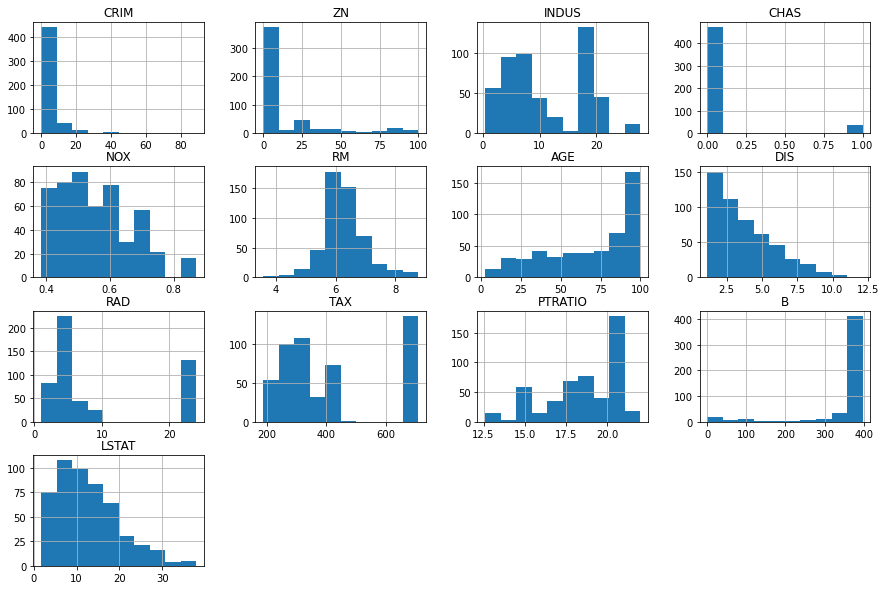

In [250]:
# Feature histogram
df.hist(figsize=(15,10))

### 3.2各个特征与房价的关系散点图

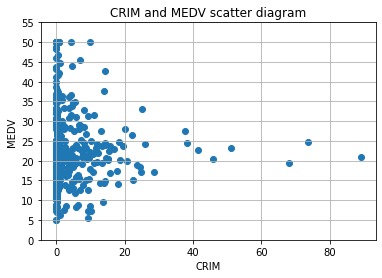

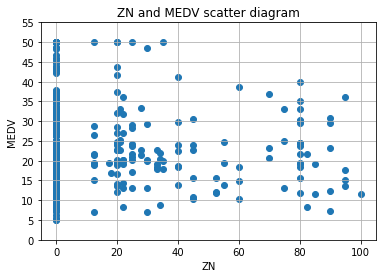

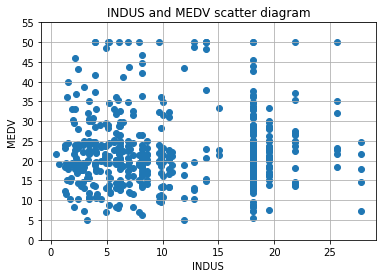

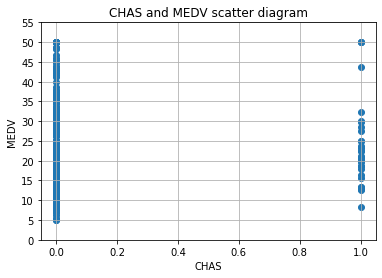

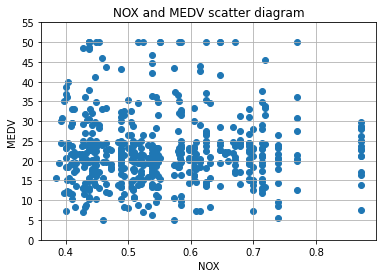

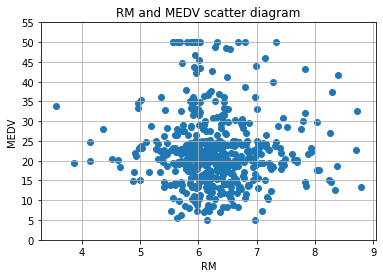

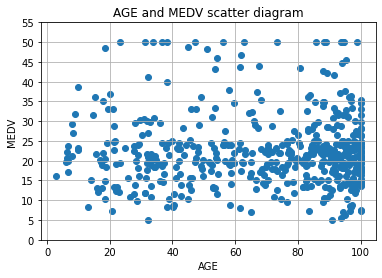

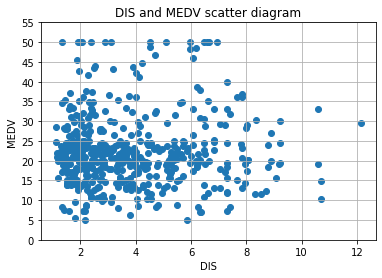

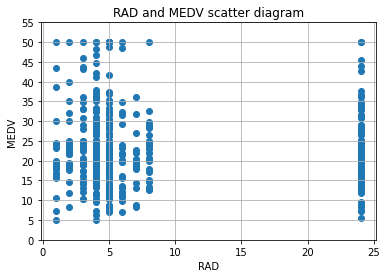

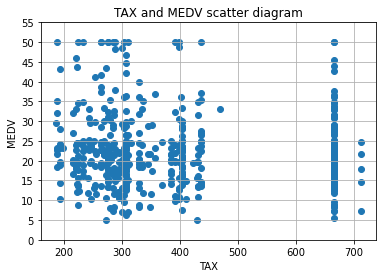

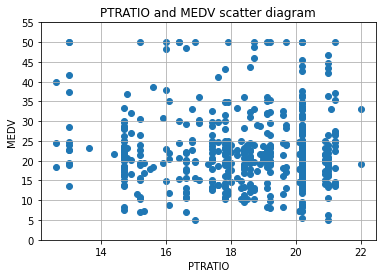

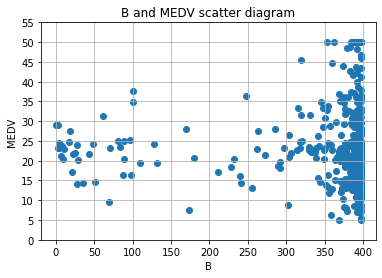

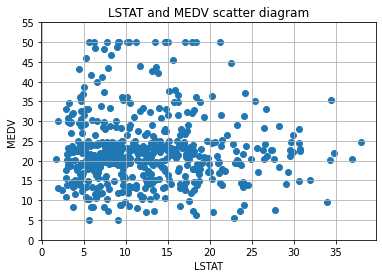

In [251]:
# Draw scatterplots of house prices by each feature
for each in data.feature_names:
    plt.scatter(df[each],y)
    plt.title(each + ' and MEDV scatter diagram')
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

### 3.3热力图

<AxesSubplot:>

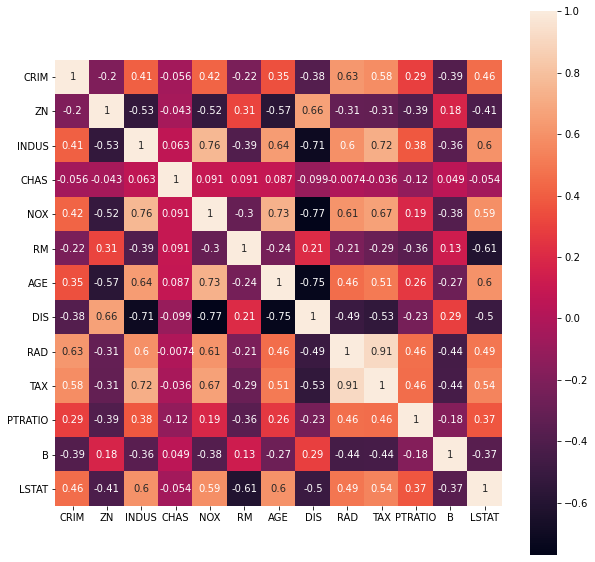

In [252]:
# Plot a heatmap of the relationship between individual features
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

### 3.4房价分布图

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

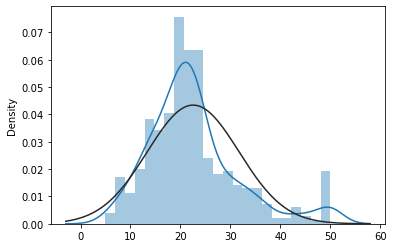

In [253]:
# Draw a house price distribution graph to see if the house price distribution is a normal distribution
sns.distplot(y,fit=stats.norm)

### 3.5概率图

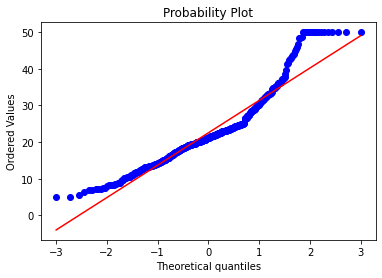

In [254]:
res = stats.probplot(y, plot=plt)

# 4.数据处理

### 4.1对数变换

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

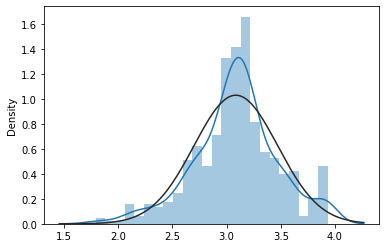

In [255]:
# The distribution of the data does not follow a normal distribution, so a log transformation may be required
y_log = np.log1p(y)
sns.distplot(y_log, fit=stats.norm)

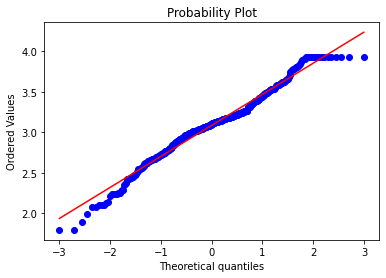

In [256]:
res = stats.probplot(y_log, plot=plt)

In [257]:
# Test R^2 score of the model before and after log transformation on a ridge regression model
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model before log transforamtion:{:,.10f}".format(test_reg_score))
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
test_reg_log = Ridge()
test_reg_log.fit(X_train, y_train_log)
test_reg_y_predict_log = test_reg_log.predict(X_test)
test_reg_score_log = r2_score(y_test_log, test_reg_y_predict_log)
print ("R^2 score of the test model after log transforamtion:{:,.10f}".format(test_reg_score_log))

R^2 score of the test model before log transforamtion:0.6816407322
R^2 score of the test model after log transforamtion:0.7219696773


In [258]:
# test2_reg = SVR()
# test2_reg.fit(X_train, y_train)
# test2_reg_y_predict = test2_reg.predict(X_test)
# test2_reg_score = r2_score(y_test, test2_reg_y_predict)
# print ("R^2 score of the test model2 before log transforamtion:{:,.10f}".format(test2_reg_score))

# test2_reg_log = SVR()
# test2_reg_log.fit(X_train, y_train_log)
# test2_reg_y_predict_log = test2_reg_log.predict(X_test)
# test2_reg_score_log = r2_score(y_test_log, test2_reg_y_predict_log)
# print ("R^2 score of the test model2 after log transforamtion:{:,.10f}".format(test2_reg_score_log))

### 4.2缺失值处理

In [259]:
# Check for missing values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### 4.3删除一些特征

In [260]:
# View the relationship between the features and MEDV
y_train_df = pd.DataFrame(y_train, columns = ['MEDV'])
y_test_df = pd.DataFrame(y_test, columns = ['MEDV'])
y_df = pd.concat([y_train_df,y_test_df],ignore_index=True,sort=False)
xy_df = pd.concat([df,y_df],axis=1)
# xy_df.to_csv('boston.csv')
xy_df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

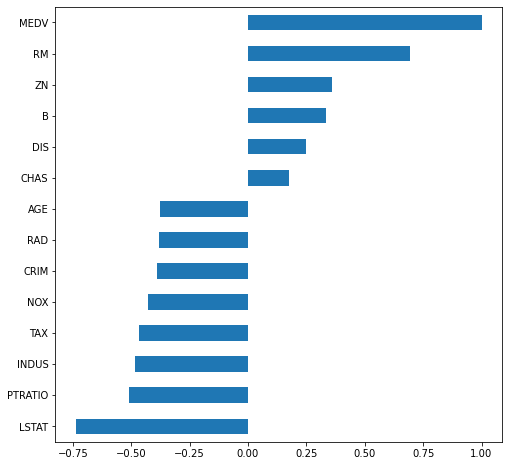

In [261]:
# Visualize the relationship between features and MEDV through graphs
corr = xy_df.corr()['MEDV']
corr_plot = corr.copy()
corr_plot.sort_values(ascending=True,inplace=True)
corr_plot.plot.barh(figsize=(8,8))

In [262]:
feature_names = load_boston().feature_names
score = {}
# Test R^2 score of the model before removing any features on a ridge regression model
print("Before removing any features:")
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model:{:,.10f}".format(test_reg_score))
score['Original'] = test_reg_score
# Test R^2 score of the model after removing each feature on a ridge regression model
for i in range(13):
    X_train_d = np.delete(X_train,i,axis=1)
    X_test_d = np.delete(X_test,i,axis=1)
    test_reg_d = Ridge()
    test_reg_d.fit(X_train_d, y_train)
    test_reg_y_predict_d = test_reg_d.predict(X_test_d)
    test_reg_score_d = r2_score(y_test, test_reg_y_predict_d)
    print ("After removing %s: "%(feature_names[i]))
    print ("R^2 score of the test model:{:,.10f}".format(test_reg_score_d))
    score[feature_names[i]] = test_reg_score_d

Before removing any features:
R^2 score of the test model:0.6816407322
After removing CRIM: 
R^2 score of the test model:0.6856170444
After removing ZN: 
R^2 score of the test model:0.6664230707
After removing INDUS: 
R^2 score of the test model:0.6815856576
After removing CHAS: 
R^2 score of the test model:0.6826652669
After removing NOX: 
R^2 score of the test model:0.6629871769
After removing RM: 
R^2 score of the test model:0.6413203629
After removing AGE: 
R^2 score of the test model:0.6818477898
After removing DIS: 
R^2 score of the test model:0.6246593144
After removing RAD: 
R^2 score of the test model:0.6574795642
After removing TAX: 
R^2 score of the test model:0.6681304224
After removing PTRATIO: 
R^2 score of the test model:0.6492138623
After removing B: 
R^2 score of the test model:0.6674864669
After removing LSTAT: 
R^2 score of the test model:0.6093221410


<AxesSubplot:>

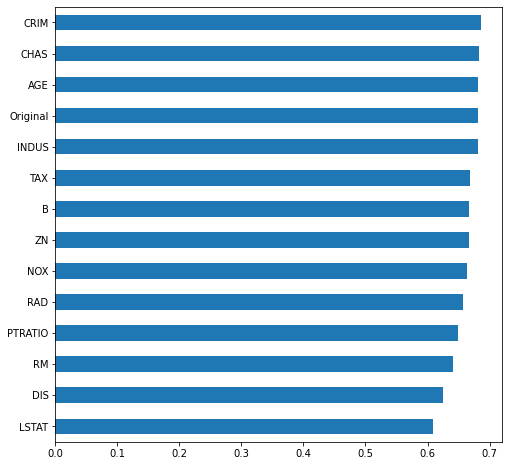

In [263]:
# Visualize the results of the R^2 score without removing any featur and after removing each feature
score = pd.Series(score)
score_plot = score.copy()
score_plot.sort_values(ascending=True,inplace=True)
score_plot.plot.barh(figsize=(8,8))

# 5.特征工程

### 特征偏度

In [264]:
# from scipy.stats import norm,skew

# numeric_feats = df.select_dtypes(exclude=['object']).columns
# skewed_feats = df[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
# print('\n Skew in numerical features:\n')
# skewness = pd.DataFrame({'Skew':skewed_feats})
# skewness.head(10)

### 用box-cox变换来处理

In [265]:
# skewness = skewness[abs(skewness)>0.75]
# print('{}skewed features'.format(skewness.shape[0]))

# skewed_feats = skewness.index
# lam = 0.15
# for feat in skewed_feats:
#     df[feat] = boxcox1p(df[feat],lam)

### 最后进行one-hot 编码

In [266]:
# df = pd.get_demmies(df)
# print(df.shape)

### 5.1数据增强

In [267]:
split_features = {
    'CRIM':3,
    'ZN':3,
    'INDUS':4,
    'NOX':5,
    'RM':3,
    'AGE':7,
    'DIS':3,
    'RAD':2,
    'TAX':4,
    'PTRATIO':3,
    'B':4,
    'LSTAT':5
}

In [268]:
df_con = df
for f,g in split_features.items():
    new = pd.cut(df[f],g)
    #One-hot encoder
    onehot = pd.get_dummies(new,prefix=f)
    df_con = pd.concat([df_con, onehot], axis=1)
df_con

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,"PTRATIO_(18.867, 22.0]","B_(-0.0766, 99.465]","B_(99.465, 198.61]","B_(198.61, 297.755]","B_(297.755, 396.9]","LSTAT_(1.694, 8.978]","LSTAT_(8.978, 16.226]","LSTAT_(16.226, 23.474]","LSTAT_(23.474, 30.722]","LSTAT_(30.722, 37.97]"
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,...,1,0,0,0,1,1,0,0,0,0
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,...,1,0,0,0,1,1,0,0,0,0
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,...,1,0,0,0,1,0,1,0,0,0
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,...,0,0,0,0,1,1,0,0,0,0
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,...,1,0,0,0,1,0,1,0,0,0
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,...,0,0,0,0,1,1,0,0,0,0
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,...,1,0,0,0,1,0,1,0,0,0
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,...,1,0,0,0,1,0,0,0,0,1


### 5.2标准化

In [269]:
# Data normalization after data augmentation
scaler = StandardScaler()
train_X_len = X_train.shape[0]
train_X = df_con[:train_X_len]
test_X = df_con[train_X_len:]
X_train_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [270]:
# Use PCA to select and reduce the number of features and reduce the dimension to 50
pca = PCA(n_components=50)
X_train_scaled = pca.fit_transform(X_train_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [271]:
# print(X_test[0])
# # X_test=np.append(X_test,[2.818380,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42])
d=np.array([2.81838e+00,0.00000e+00,1.81000e+01,0.00000e+00,5.32000e-01,5.76200e+00,4.03000e+01,4.09830e+00,2.40000e+01,6.66000e+02,2.02000e+01,3.92920e+02,1.04200e+01])
X_test0=np.insert(X_test,0,d,axis=0)
print(X_test0)

# Data normalization without data augmentation
transfer  = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)

print(X_test0)
X_test0 = transfer.fit_transform(X_test0)
print(X_test0)

[[2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [4.54400e-02 0.00000e+00 3.24000e+00 ... 1.69000e+01 3.68570e+02
  9.09000e+00]
 [3.87100e-02 5.25000e+01 5.32000e+00 ... 1.66000e+01 3.96900e+02
  7.14000e+00]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.11081e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.47700e+01]
 [5.44114e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.55290e+02
  1.77300e+01]]
[[2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [4.54400e-02 0.00000e+00 3.24000e+00 ... 1.69000e+01 3.68570e+02
  9.09000e+00]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.11081e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.47700e+01]
 [5.44114e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.55290e+02
  1.77300e+01]]
[[2.81838e+00 0.

# 6.建模对比

## 6.1线性回归模型

### 方法一：线性回归  log

### 无数据增强

In [272]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(X_test)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.6645740822 on test data.


array([3.09991598, 3.1481634 , 3.39441833, 2.78017077, 2.38942475,
       2.78872525, 3.20599756, 3.30852657, 3.33292678, 2.90381834,
       3.22698316, 3.48645081, 2.4996232 , 3.14281915, 3.15817907,
       3.49806443, 2.80770331, 2.93502074, 3.11062508, 2.90180087,
       3.29106004, 3.30274066, 3.0117067 , 3.50575342, 3.0328315 ,
       1.97545823, 3.75334476, 2.93200042, 3.22352151, 3.22703403,
       3.29067698, 3.54054492, 3.2125636 , 3.4185683 , 3.2880477 ,
       3.52324213, 3.29300783, 3.28667084, 2.02866859, 3.40517474,
       3.16344681, 3.28040321, 2.79247261, 2.79686683, 3.00792228,
       3.01616937, 3.18037337, 3.58867585, 3.01729245, 2.94378409,
       2.16117449, 3.40348995, 3.20280071, 3.88253022, 3.35620242,
       2.2232303 , 3.43862253, 3.65642534, 3.37106856, 3.11207782,
       3.20190491, 3.0284252 , 2.85555469, 2.89554645, 3.29552503,
       3.41974236, 3.31862129, 3.29347363, 3.25963995, 3.7155864 ,
       3.40849236, 3.61291919, 3.03199814, 3.34463194, 2.45104

In [273]:
def figure_prediction(y_real, y_predict):
    plt.figure(figsize=(20,5))
    plt.xlabel('id', fontsize=15)
    plt.ylabel('MEDV', fontsize=15)
    plt.plot(np.arange(0,y_real.shape[0]), y_real, c='green', linestyle='--')
    plt.plot(np.arange(0,y_real.shape[0]), y_predict, c='red', linestyle='-.')

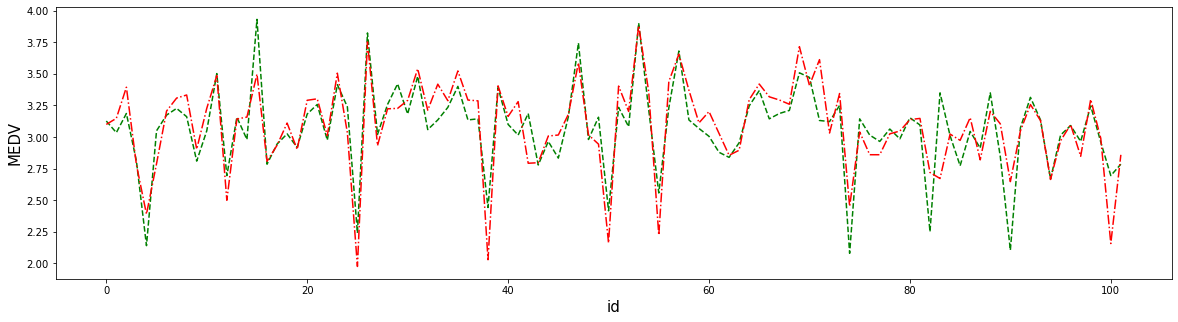

In [274]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### 有数据增强

In [275]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train_scaled, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.7766367935 on test data.


array([3.15360819, 3.10463095, 3.29758011, 2.89514384, 2.39955273,
       2.86553891, 3.13189563, 3.28455196, 3.1720217 , 2.83205359,
       3.06307767, 3.29463767, 2.65094269, 3.01012273, 3.09405284,
       3.68561837, 2.79601975, 2.94131393, 3.10469752, 2.8700234 ,
       3.24140163, 3.3056183 , 3.10107954, 3.34616234, 3.17373013,
       2.17493781, 3.7237732 , 2.97977416, 3.21476821, 3.14965793,
       3.28873534, 3.42102783, 3.15416994, 3.47858103, 3.33230259,
       3.40347818, 3.16956348, 3.23266088, 2.23937196, 3.30323445,
       3.12029787, 3.14631033, 2.72338444, 2.74837783, 2.98692324,
       2.96905832, 3.13204186, 3.4785953 , 3.02766782, 2.87859078,
       2.39353339, 3.23285801, 3.13888753, 3.7881877 , 3.26607735,
       2.65654475, 3.35410626, 3.6366753 , 3.12866709, 3.09841419,
       3.18828234, 3.12566499, 2.80621509, 3.00279879, 3.18614676,
       3.23107665, 3.20417914, 3.09579048, 3.2203126 , 3.63319155,
       3.36615481, 3.6901459 , 3.01616357, 3.25938498, 2.54626

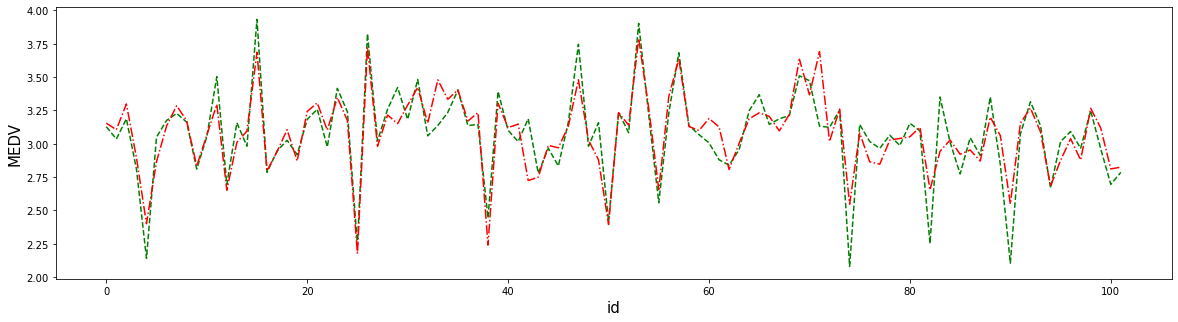

In [276]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### 方法二：随机参数回归 log

### 无数据增强

In [277]:
# The random parameter regression module instantiates an object
sgd_reg = SGDRegressor(max_iter=1000,tol=0.001)#tol=0.001是指的是每次迭代是否损失函数越来越小，如果损失函数的值小于0.001的话就停止迭代
# Fit the training set with the random parameter regression module
sgd_reg.fit(X_train, y_train_log)
# Get the predicted value
sgd_reg_y_predict = sgd_reg.predict(X_test)
# Get the R^2 score of the trained model
sgd_reg_score = r2_score(y_test_log, sgd_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(sgd_reg_score))
sgd_reg_y_predict

R^2 score 0.6438281510 on test data.


array([3.05413408, 3.21496601, 3.36764769, 2.80053256, 2.39344993,
       2.7554743 , 3.2011232 , 3.31423355, 3.30421801, 2.95711979,
       3.20362853, 3.50798151, 2.55030018, 3.13744221, 3.14068207,
       3.46092794, 2.82732238, 2.95842385, 3.05659332, 2.91633167,
       3.28862129, 3.30702468, 3.08412756, 3.50582523, 3.05248109,
       1.98819701, 3.75796233, 2.93187705, 3.19789305, 3.20055348,
       3.31735267, 3.52071077, 3.19629983, 3.40127032, 3.3063793 ,
       3.51494515, 3.30447471, 3.26932086, 2.00165469, 3.37290352,
       3.18067258, 3.2597019 , 2.77611369, 2.76396667, 3.03135064,
       2.98391406, 3.16616364, 3.57338734, 3.0305126 , 2.92440915,
       2.13090004, 3.37428041, 3.20380026, 3.84988433, 3.33553717,
       2.15655058, 3.39956902, 3.69571882, 3.39308921, 3.11327425,
       3.20898224, 3.04054419, 2.84546031, 2.93538059, 3.32716908,
       3.42358594, 3.29897309, 3.2854946 , 3.23952012, 3.69675177,
       3.44806037, 3.66323585, 3.05697758, 3.33371046, 2.52801

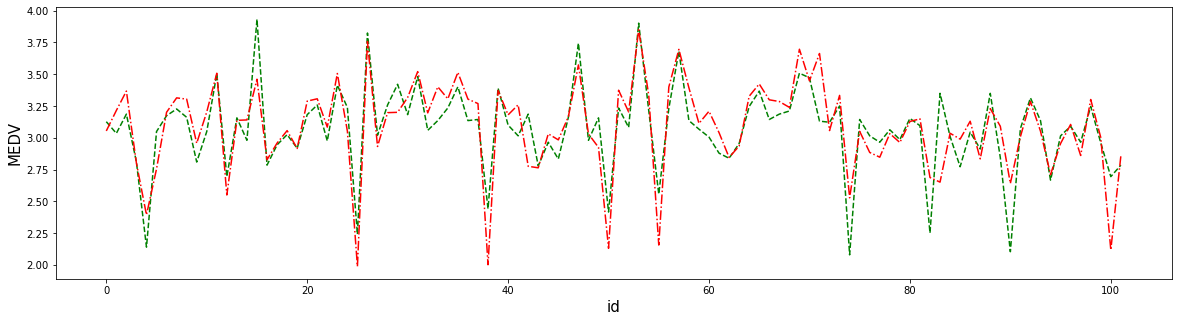

In [278]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, sgd_reg_y_predict)

### 有数据增强

In [279]:
# The random parameter regression module instantiates an object
sgd_reg = SGDRegressor(max_iter=1000,tol=0.001)#tol=0.001是指的是每次迭代是否损失函数越来越小，如果损失函数的值小于0.001的话就停止迭代
# Fit the training set with the random parameter regression module
sgd_reg.fit(X_train_scaled, y_train_log)
# Get the predicted value
sgd_reg_y_predict = sgd_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
sgd_reg_score = r2_score(y_test_log, sgd_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(sgd_reg_score))
sgd_reg_y_predict

R^2 score 0.7738754847 on test data.


array([3.09044202, 3.12291303, 3.26878025, 2.78877063, 2.42341732,
       2.99202297, 3.10537122, 3.2829575 , 3.17279084, 2.88191842,
       3.08773444, 3.51245388, 2.59357043, 3.08125581, 3.06994009,
       3.60045026, 2.82801788, 3.01839987, 3.07291416, 2.92846069,
       3.22713067, 3.28449526, 3.12720673, 3.40813681, 3.13027843,
       2.23190716, 3.71196269, 2.83996636, 3.23938494, 3.13763268,
       3.25518403, 3.43714591, 3.10162812, 3.20790393, 3.26972188,
       3.47533548, 3.2618026 , 3.2080636 , 2.33684318, 3.2053186 ,
       3.05091416, 3.07849286, 2.66888375, 2.68846622, 3.0545227 ,
       2.97348092, 3.14353412, 3.50438013, 2.91125846, 2.8529708 ,
       2.41549154, 3.29231033, 3.08515899, 3.72856969, 3.24282483,
       2.70606195, 3.3736977 , 3.66109868, 3.29555268, 3.00017744,
       3.06996571, 3.06821893, 2.75724856, 3.02845923, 3.28423144,
       3.31233163, 3.23896058, 3.16146158, 3.25197029, 3.57581217,
       3.33495328, 3.65233509, 2.98831757, 3.2122569 , 2.59843

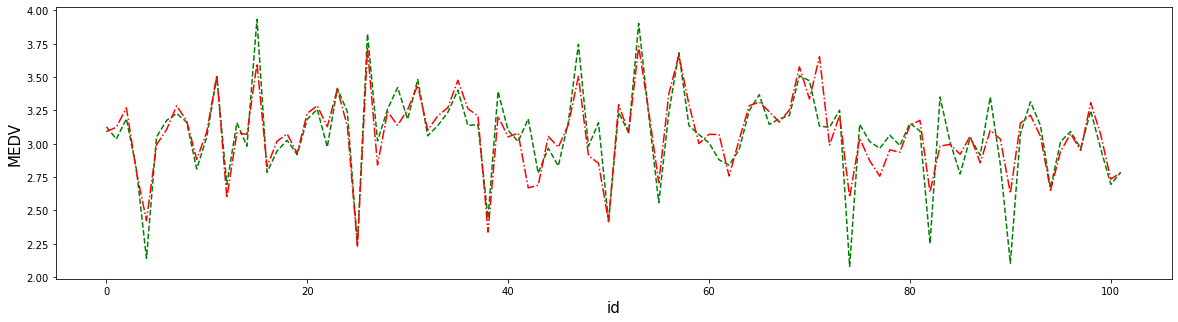

In [280]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, sgd_reg_y_predict)

### 网格搜索

In [281]:
# Use Grid_Search to get the best parameters for the model
def grid_search(model, X, y, params):
    grid = GridSearchCV(estimator = model, param_grid = params, scoring = "r2", cv = 5)
    grid.fit(X,y)
    # Specify the model as the model corresponding to the best parameter
    best_model = grid.best_estimator_
    # View the best parameters and best score
    print("Parameters are {} for the optimal model.".format(grid.best_params_))
    print("Optimal model has best score {:,.10f}.".format(grid.best_score_))
    # View the test score of the model with different parameters
    for i in range(len(grid.cv_results_['mean_test_score'])):
        print(grid.cv_results_['params'][i], "Test score: {:,.10f}".format(grid.cv_results_['mean_test_score'][i]))
    return best_model

### 方法三：岭回归 log

### 无数据增强

In [282]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(X_test)
# Get the R^2 score of the trained model
# ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 10} for the optimal model.
Optimal model has best score 0.7914954146.
{'alpha': 0.001} Test score: 0.7910541613
{'alpha': 0.01} Test score: 0.7910572027
{'alpha': 0.05} Test score: 0.7910706178
{'alpha': 0.1} Test score: 0.7910871544
{'alpha': 0.5} Test score: 0.7912104852
{'alpha': 1} Test score: 0.7913437575
{'alpha': 10} Test score: 0.7914954146
{'alpha': 20} Test score: 0.7896578728


array([3.07566275, 3.1807755 , 3.37594139, 2.79519732, 2.40752657,
       2.77845082, 3.20089934, 3.30636207, 3.3187472 , 2.93511186,
       3.21432661, 3.49209372, 2.53689804, 3.14258567, 3.1488082 ,
       3.47280361, 2.82497434, 2.94857145, 3.08255939, 2.91384167,
       3.28553903, 3.30002395, 3.04666167, 3.50022677, 3.04745763,
       2.00801583, 3.74103901, 2.94046661, 3.20720079, 3.21610485,
       3.30010681, 3.5233538 , 3.20361035, 3.40538123, 3.29108097,
       3.51491996, 3.29403173, 3.27164627, 2.04034423, 3.38120738,
       3.17291648, 3.27225416, 2.79014206, 2.78646756, 3.02044364,
       3.00192461, 3.17352014, 3.56786625, 3.02877934, 2.93919677,
       2.16918034, 3.38515098, 3.20205145, 3.85499147, 3.33887393,
       2.21266488, 3.41108588, 3.66447441, 3.37844636, 3.10922431,
       3.20525904, 3.03853523, 2.85361413, 2.91839515, 3.30746357,
       3.41609375, 3.30768313, 3.28908018, 3.24527863, 3.70021746,
       3.42203246, 3.62368712, 3.04919282, 3.33516093, 2.50323

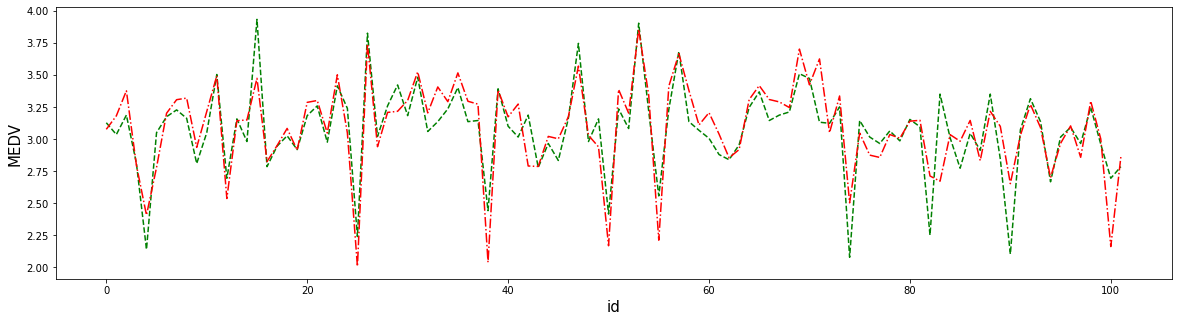

In [283]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

### 有数据增强

In [284]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train_scaled,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 1} for the optimal model.
Optimal model has best score 0.8291978390.
{'alpha': 0.001} Test score: 0.8281045342
{'alpha': 0.01} Test score: 0.8281320928
{'alpha': 0.05} Test score: 0.8282467159
{'alpha': 0.1} Test score: 0.8283736607
{'alpha': 0.5} Test score: 0.8289648596
{'alpha': 1} Test score: 0.8291978390
{'alpha': 10} Test score: 0.8256518358
{'alpha': 20} Test score: 0.8213904289


array([3.18738542, 3.11398647, 3.25422154, 2.9543623 , 2.41221131,
       2.90696826, 3.15505555, 3.24400517, 3.21728173, 2.83979615,
       3.06953946, 3.38269799, 2.69575019, 3.03268846, 3.12140688,
       3.67711715, 2.78170691, 2.94863418, 3.12825847, 2.84605035,
       3.22225168, 3.27894384, 3.10775262, 3.39540555, 3.12555558,
       2.25657947, 3.70154625, 2.94512424, 3.24922839, 3.1843927 ,
       3.30027322, 3.46720991, 3.13896264, 3.3585579 , 3.2918416 ,
       3.42924163, 3.18945567, 3.18512376, 2.18088857, 3.25629174,
       3.08289452, 3.1407004 , 2.70195688, 2.74653859, 2.98022835,
       2.93874022, 3.16697891, 3.47183076, 2.9918676 , 2.87106927,
       2.32783283, 3.25116035, 3.11277078, 3.79886501, 3.22004033,
       2.5978956 , 3.35505097, 3.59689645, 3.18432349, 3.03698465,
       3.1435208 , 3.04903396, 2.80077214, 3.02057599, 3.23351213,
       3.24964799, 3.20855597, 3.16332422, 3.22833478, 3.5861072 ,
       3.38144368, 3.63699327, 3.00734602, 3.23401891, 2.57360

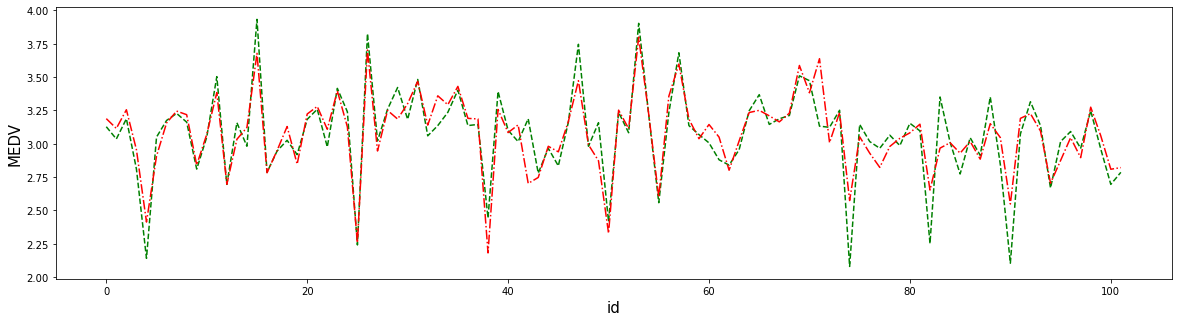

In [285]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

In [286]:
# testing set
ridge_alpha = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]
for i in ridge_alpha:
    # The ridge regression module instantiates an object
    ridge_reg = Ridge(alpha=i)#(alpha表示正则的程度）
    # Fit the training set with the ridge regression module
    ridge_reg.fit(X_train_scaled, y_train_log)
    # Model evaluation
    ridge_reg_y_predict = ridge_reg.predict(test_X_scaled)
    ridge_reg_score = r2_score(y_test_log, ridge_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(ridge_reg_score))
#     print("预测值为:\n", ridge_reg_y_predict)
#     print("模型中的系数为:\n", ridge_reg.coef_)
#     print("模型中的偏置为:\n", ridge_reg.intercept_)

alpha:0.001    R^2 score:0.7872096114
alpha:0.01    R^2 score:0.7872913565
alpha:0.05    R^2 score:0.7876428145
alpha:0.1    R^2 score:0.7880563752
alpha:0.5    R^2 score:0.7905597570
alpha:1    R^2 score:0.7923795937
alpha:10    R^2 score:0.7879944407
alpha:20    R^2 score:0.7781435733


### 模型评估 MSE（均方误差，越小越好）

In [287]:
# 计算均方误差,越小越好
ridge_reg_MSE = mean_squared_error(y_true=y_test_log, y_pred=ridge_reg_y_predict)
ridge_reg_MSE

0.024609011023185884

### 方法四：贝叶斯岭回归 log

### 无数据增强

In [288]:
# training set
# Get the best parameters for the model
bridge_reg = grid_search(BayesianRidge(),X_train,y_train_log,{})
# Use the best model to make predictions
bridge_reg_y_predict = bridge_reg.predict(X_test)
# Get the R^2 score of the trained model
bridge_score = r2_score(y_test_log, bridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(bridge_score))
bridge_reg_y_predict

Parameters are {} for the optimal model.
Optimal model has best score 0.7916508857.
{} Test score: 0.7916508857
Optimal model has R^2 score 0.6655393405 on test data.


array([3.08740929, 3.16632297, 3.38435922, 2.78788243, 2.39845483,
       2.78332793, 3.20307916, 3.30740909, 3.32596421, 2.92029569,
       3.22000219, 3.48940057, 2.51846486, 3.1425701 , 3.15276936,
       3.48585946, 2.81638139, 2.94232706, 3.09615341, 2.90789311,
       3.28817358, 3.30132265, 3.03017335, 3.50343871, 3.04093049,
       1.99156299, 3.74724772, 2.93693768, 3.21530988, 3.22106115,
       3.29554852, 3.53183721, 3.20800877, 3.4116116 , 3.28943793,
       3.51917539, 3.29380177, 3.27819283, 2.03405462, 3.39226301,
       3.16921247, 3.27623855, 2.79113082, 2.79139805, 3.0143199 ,
       3.00781399, 3.17656949, 3.57843457, 3.02391092, 2.94077626,
       2.16466057, 3.39369867, 3.20289099, 3.86794385, 3.34679633,
       2.21736092, 3.42480183, 3.66143747, 3.3751857 , 3.11010165,
       3.20455182, 3.03411531, 2.85444223, 2.90699491, 3.30176767,
       3.41795933, 3.31308428, 3.29147053, 3.25242757, 3.70788415,
       3.41602206, 3.61932055, 3.04154788, 3.33917119, 2.47983

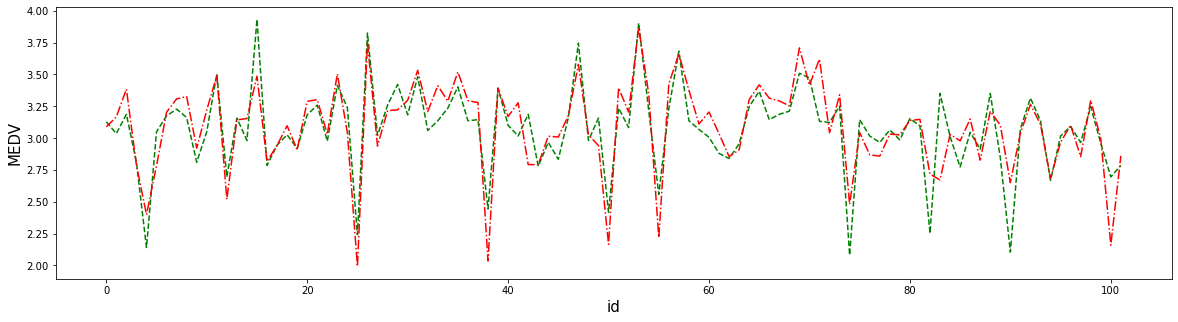

In [289]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, bridge_reg_y_predict)

### 有数据增强

In [290]:
# training set
# Get the best parameters for the model
bridge_reg = grid_search(BayesianRidge(),X_train_scaled,y_train_log,{})
# Use the best model to make predictions
bridge_reg_y_predict = bridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
bridge_score = r2_score(y_test_log, bridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(bridge_score))
bridge_reg_y_predict

Parameters are {} for the optimal model.
Optimal model has best score 0.8245597117.
{} Test score: 0.8245597117
Optimal model has R^2 score 0.7883048032 on test data.


array([3.14137185, 3.1249874 , 3.26823722, 2.88104479, 2.42231048,
       2.94959248, 3.1353962 , 3.25676253, 3.19157356, 2.88311371,
       3.08655606, 3.49303981, 2.66119093, 3.06279576, 3.08820809,
       3.61646417, 2.80467719, 2.98950726, 3.10022913, 2.89160432,
       3.21204997, 3.2659698 , 3.14635188, 3.40134663, 3.11539544,
       2.26814399, 3.69920996, 2.88645716, 3.23629674, 3.14741955,
       3.28931722, 3.44554705, 3.12267089, 3.25528747, 3.27252094,
       3.44305115, 3.23155779, 3.19100645, 2.25843406, 3.21732211,
       3.07466536, 3.11704349, 2.69014697, 2.71712315, 3.00943381,
       2.95485827, 3.15532089, 3.47364266, 2.95121926, 2.87099204,
       2.37382344, 3.2833993 , 3.10275451, 3.7737289 , 3.23441477,
       2.64849885, 3.35939994, 3.62973897, 3.26965731, 3.01229294,
       3.10772657, 3.04990374, 2.77671852, 3.04391508, 3.27835628,
       3.28781274, 3.22503254, 3.16610185, 3.23090774, 3.57266615,
       3.36154089, 3.63199159, 2.99587723, 3.21763254, 2.56321

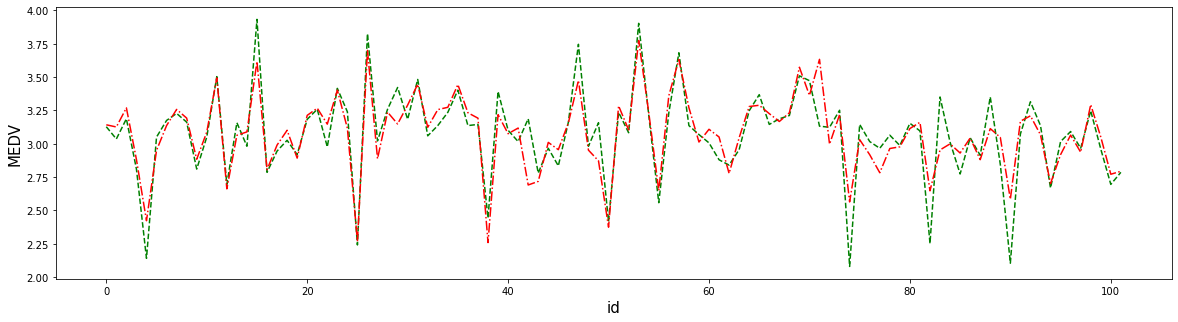

In [291]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, bridge_reg_y_predict)

In [292]:
# testing set
# The Bayesian Ridge Regression module instantiates an object
bridge_reg = BayesianRidge()
# Fit the training set with the Bayesian Ridge Regression module
bridge_reg.fit(X_train_scaled, y_train_log)
# Model evaluation
bridge_reg_y_predict = bridge_reg.predict(test_X_scaled)
bridge_reg_score = r2_score(y_test_log, bridge_reg_y_predict)
print ("R^2 score:{:,.10f}".format(bridge_reg_score))

R^2 score:0.7883048032


### 方法五：Lasso回归 log

### 无数据增强

In [293]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(X_test)
# Get the R^2 score of the trained model
# lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.7912468200.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.7912468200
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.7864386868
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7766929808
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7597821061
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7499404399
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7366029669
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7230197826
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6306112776


array([3.08964077, 3.17517229, 3.38220658, 2.79241257, 2.3981984 ,
       2.78479095, 3.20264754, 3.31034188, 3.33082498, 2.92509109,
       3.2170205 , 3.48453283, 2.51732303, 3.14476315, 3.15538987,
       3.48674055, 2.81387482, 2.93745919, 3.09334407, 2.9080596 ,
       3.29092053, 3.30517897, 3.03298884, 3.51071839, 3.04611987,
       1.99080668, 3.74633716, 2.93724175, 3.21558255, 3.22244585,
       3.29292068, 3.53875733, 3.20959423, 3.4100388 , 3.29209344,
       3.51965873, 3.29398985, 3.27625826, 2.03311022, 3.3885448 ,
       3.17227139, 3.27403977, 2.79082322, 2.79152784, 3.01313087,
       3.00259626, 3.17923097, 3.57687375, 3.02360424, 2.93734869,
       2.16192755, 3.39253955, 3.2039073 , 3.86077426, 3.34668352,
       2.21907439, 3.42453573, 3.66238908, 3.37465001, 3.10723143,
       3.20797115, 3.0362306 , 2.85361226, 2.90672907, 3.30006939,
       3.41954736, 3.31630418, 3.29689149, 3.25068727, 3.7065741 ,
       3.41828337, 3.6173018 , 3.04505799, 3.33616093, 2.47711

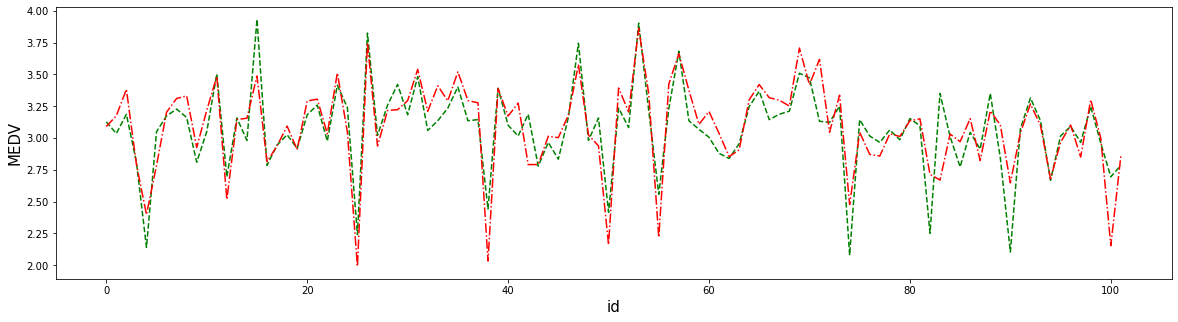

In [294]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

### 有数据增强

In [295]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train_scaled,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.8326263099.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.8326263099
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.8176017782
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7916897118
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7707489534
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7505551728
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7361717555
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7239874882
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6579232582
Optimal model has R^2 score 0.7908607225 on test data.


array([3.19529066, 3.13347253, 3.27578049, 2.96249927, 2.41530114,
       2.91942521, 3.15856687, 3.2612196 , 3.22876661, 2.86595257,
       3.09347385, 3.41750332, 2.71121597, 3.05197287, 3.12426549,
       3.6392239 , 2.80378763, 2.96114954, 3.1419796 , 2.85748343,
       3.22147175, 3.27253381, 3.12810125, 3.40995539, 3.10189211,
       2.2954134 , 3.7018321 , 2.93224393, 3.24003591, 3.15443591,
       3.28129932, 3.46333809, 3.14020777, 3.32898557, 3.27838018,
       3.41792545, 3.18954479, 3.19458975, 2.20506873, 3.23533038,
       3.09075056, 3.14367469, 2.70247369, 2.74971034, 2.98348422,
       2.95492378, 3.15341725, 3.45482921, 2.99030399, 2.87284723,
       2.32968973, 3.25044687, 3.10703696, 3.80039558, 3.2276761 ,
       2.60999324, 3.33974496, 3.60938426, 3.21648137, 3.01817859,
       3.13358744, 3.02965836, 2.80342697, 3.01052617, 3.2670358 ,
       3.27764107, 3.20281247, 3.1926032 , 3.23334484, 3.5845338 ,
       3.34823802, 3.60454218, 3.00089881, 3.23650883, 2.55666

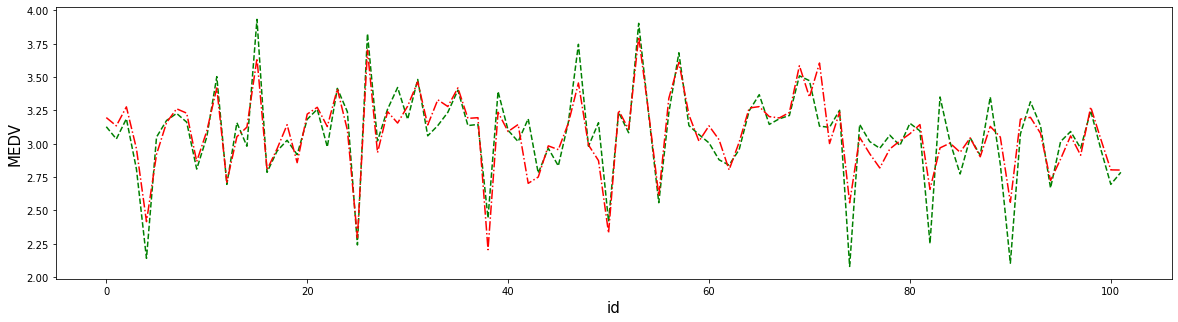

In [296]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

In [297]:
# testing set
lasso_alpha = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
for i in lasso_alpha:
    # The Lasso regression module instantiates an object
    lasso_reg = Lasso(alpha=i, max_iter=1000)#(alpha表示正则的程度）
    # Fit the training set with the Lasso regression module
    lasso_reg.fit(X_train_scaled, y_train_log)
   # Model evaluation
    lasso_reg_y_predict = lasso_reg.predict(test_X_scaled)
    lasso_reg_score = r2_score(y_test_log, lasso_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(lasso_reg_score))

alpha:0.001    R^2 score:0.7908607225
alpha:0.005    R^2 score:0.7615708813
alpha:0.01    R^2 score:0.7045562773
alpha:0.02    R^2 score:0.6562410738
alpha:0.03    R^2 score:0.6090151253
alpha:0.04    R^2 score:0.5863412030
alpha:0.05    R^2 score:0.5733204109
alpha:0.1    R^2 score:0.5041833002


### 方法六: ElasticNet回归 log

### 无数据增强

In [298]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(X_test)
# Get the R^2 score of the trained model
# en_score = r2_score(y_test_log, en_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.7916181036.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7911656427
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7911517675
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7911299549
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7911892188
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7914480571
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7914652171
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7910024757
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7897407637
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7916181036
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7902122248
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7860937008


array([3.08074341, 3.18676406, 3.37554243, 2.79783265, 2.40489059,
       2.78100209, 3.20082073, 3.30956821, 3.3254179 , 2.93643662,
       3.21247009, 3.48670967, 2.53106509, 3.14461419, 3.15194114,
       3.47739188, 2.82024303, 2.94255896, 3.08315087, 2.9124471 ,
       3.28886392, 3.30413509, 3.04565409, 3.50848071, 3.05127257,
       2.00277685, 3.74193394, 2.94019169, 3.20963909, 3.21839263,
       3.29642008, 3.53232377, 3.20625867, 3.405273  , 3.29321507,
       3.51656203, 3.29437513, 3.27089158, 2.03733896, 3.3799811 ,
       3.17555947, 3.27101042, 2.78998787, 2.78769443, 3.01775092,
       2.99755586, 3.17671249, 3.56935149, 3.02769854, 2.93579796,
       2.16486956, 3.38589108, 3.20359557, 3.85091796, 3.34048688,
       2.21504838, 3.41447043, 3.66530009, 3.37731452, 3.10630967,
       3.20899643, 3.03979593, 2.85294552, 2.91507549, 3.30443113,
       3.41818955, 3.3121872 , 3.29509621, 3.24551468, 3.70093482,
       3.42314491, 3.62135894, 3.05117823, 3.33284194, 2.49609

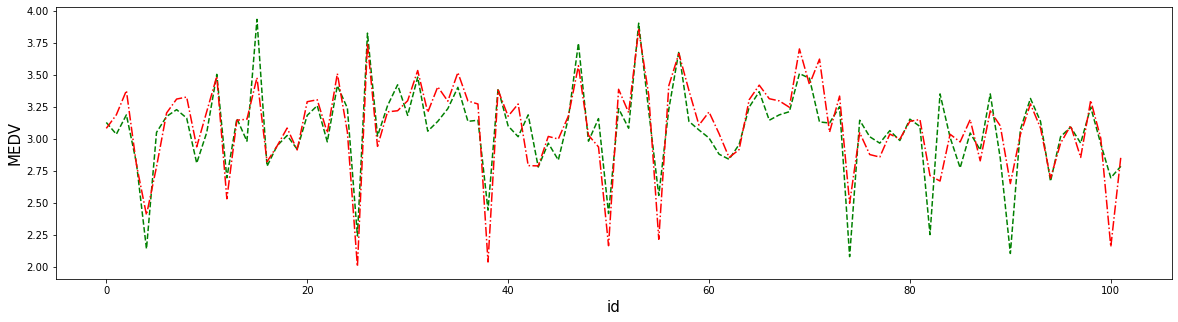

In [299]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

### 有数据增强

In [300]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train_scaled, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# en_score = r2_score(y_test_log, en_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.8326346106.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8311385911
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8319980154
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8324465886
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8326346106
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8314390882
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8301808141
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8279887016
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8246829255
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8299361495
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8251842374
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8161136213

array([3.19804474, 3.12928282, 3.26831622, 2.96279008, 2.41337596,
       2.91126099, 3.15793991, 3.2554376 , 3.22669608, 2.85587285,
       3.0836163 , 3.39816718, 2.70805886, 3.04712764, 3.12671138,
       3.65096835, 2.79823952, 2.95370958, 3.14223669, 2.85293669,
       3.22272951, 3.27594886, 3.11807752, 3.40621236, 3.10607857,
       2.28583252, 3.70019722, 2.93889015, 3.24453194, 3.16627329,
       3.28520533, 3.46465453, 3.14132885, 3.34622786, 3.28448784,
       3.41896526, 3.18676195, 3.19094867, 2.19425049, 3.24399914,
       3.09047992, 3.1462983 , 2.70157121, 2.74852414, 2.98213618,
       2.949543  , 3.15639234, 3.46003501, 2.99346085, 2.872299  ,
       2.32628986, 3.24833089, 3.10803097, 3.80068282, 3.22430464,
       2.60637325, 3.34385385, 3.60443438, 3.1994746 , 3.02597366,
       3.13829859, 3.03260871, 2.80368585, 3.01174638, 3.25319074,
       3.26516622, 3.20307147, 3.18541223, 3.23251999, 3.58661567,
       3.35575615, 3.61137311, 3.00326487, 3.23606036, 2.56450

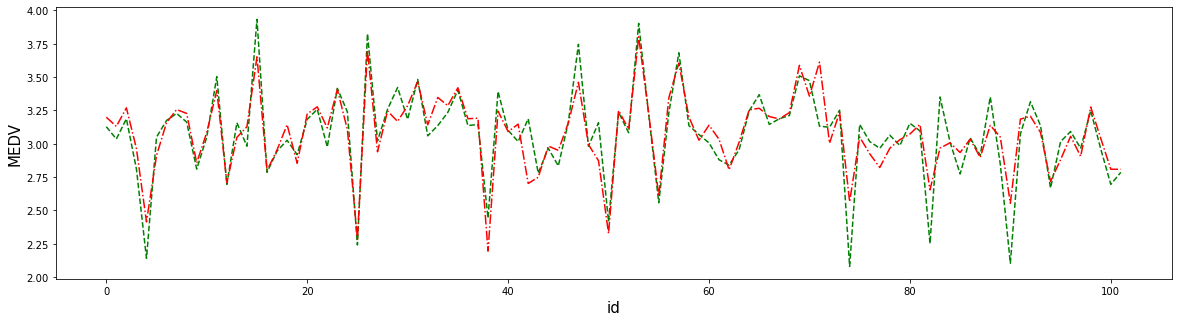

In [301]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

In [302]:
# testing set
en_alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
en_l1_ratio = [0.1, 0.3, 0.5, 0.7]
for i in en_alpha:
    for j in en_l1_ratio:
        # ElasticNet regression module instantiates an object
        en_reg = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000)#(alpha表示正则的程度）
        # Fit the training set with the ElasticNet regression module
        en_reg.fit(X_train_scaled, y_train_log)
        # Model evaluation
        en_reg_y_predict = en_reg.predict(test_X_scaled)
        en_reg_score = r2_score(y_test_log, en_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "l1_ratio:{:,}   ".format(j), "R^2 score:{:,.10f}".format(en_reg_score))

alpha:0.001    l1_ratio:0.1    R^2 score:0.7904964995
alpha:0.001    l1_ratio:0.3    R^2 score:0.7911792594
alpha:0.001    l1_ratio:0.5    R^2 score:0.7914684316
alpha:0.001    l1_ratio:0.7    R^2 score:0.7913349209
alpha:0.005    l1_ratio:0.1    R^2 score:0.7935282305
alpha:0.005    l1_ratio:0.3    R^2 score:0.7893977894
alpha:0.005    l1_ratio:0.5    R^2 score:0.7838007053
alpha:0.005    l1_ratio:0.7    R^2 score:0.7766851368
alpha:0.01    l1_ratio:0.1    R^2 score:0.7898056255
alpha:0.01    l1_ratio:0.3    R^2 score:0.7772711180
alpha:0.01    l1_ratio:0.5    R^2 score:0.7582786407
alpha:0.01    l1_ratio:0.7    R^2 score:0.7347867527
alpha:0.05    l1_ratio:0.1    R^2 score:0.7424278533
alpha:0.05    l1_ratio:0.3    R^2 score:0.6789538044
alpha:0.05    l1_ratio:0.5    R^2 score:0.6297809349
alpha:0.05    l1_ratio:0.7    R^2 score:0.5938048222
alpha:0.1    l1_ratio:0.1    R^2 score:0.6990614698
alpha:0.1    l1_ratio:0.3    R^2 score:0.6055292611
alpha:0.1    l1_ratio:0.5    R^2 score:0

## 6.2集成回归模型

### 方法七：随机森林

### 无数据增强 高

In [303]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(X_test)
# Get the R^2 score of the trained model
# rf_score = r2_score(y_test, rf_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_features': 0.6, 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.8855837351.
{'max_features': 0.6, 'n_estimators': 5} Test score: 0.8623497929
{'max_features': 0.6, 'n_estimators': 10} Test score: 0.8603525961
{'max_features': 0.6, 'n_estimators': 20} Test score: 0.8745311084
{'max_features': 0.6, 'n_estimators': 50} Test score: 0.8849980940
{'max_features': 0.6, 'n_estimators': 100} Test score: 0.8833807757
{'max_features': 0.6, 'n_estimators': 200} Test score: 0.8855837351
{'max_features': 0.7, 'n_estimators': 5} Test score: 0.8474341843
{'max_features': 0.7, 'n_estimators': 10} Test score: 0.8492116988
{'max_features': 0.7, 'n_estimators': 20} Test score: 0.8720769183
{'max_features': 0.7, 'n_estimators': 50} Test score: 0.8801834263
{'max_features': 0.7, 'n_estimators': 100} Test score: 0.8791786657
{'max_features': 0.7, 'n_estimators': 200} Test score: 0.8831757363
{'max_features': 0.8, 'n_estimators': 5} Test score: 0.8335474690
{'ma

array([21.2705, 22.317 , 23.45  , 14.9785, 11.672 , 17.0495, 20.5955,
       25.0135, 21.2525, 15.7315, 20.7625, 32.8355, 15.335 , 21.1425,
       22.076 , 40.6225, 15.9545, 17.941 , 20.7395, 18.0835, 24.029 ,
       25.2965, 22.5235, 27.6915, 20.692 ,  8.659 , 45.679 , 17.968 ,
       23.8245, 25.2375, 25.7355, 29.9065, 20.877 , 26.3165, 26.456 ,
       28.2485, 28.265 , 24.8575,  6.3375, 25.288 , 20.566 , 20.3965,
       14.003 , 11.8875, 20.0615, 19.394 , 22.157 , 38.577 , 21.122 ,
       20.2475,  7.1795, 27.308 , 21.8295, 48.188 , 23.3555, 13.849 ,
       26.3825, 45.152 , 25.288 , 21.3225, 20.843 , 20.3515, 14.922 ,
       21.4775, 24.7995, 29.8845, 22.475 , 22.0075, 21.457 , 34.069 ,
       34.405 , 41.7695, 20.1515, 25.681 , 13.5925, 20.7355, 15.425 ,
       14.2955, 19.605 , 18.518 , 21.2795, 23.771 , 10.4825, 19.0045,
       19.6555, 22.225 , 20.1535, 17.1275, 24.536 , 20.124 ,  9.232 ,
       20.7205, 27.0965, 20.856 , 14.462 , 19.965 , 21.415 , 18.3405,
       24.7235, 20.1

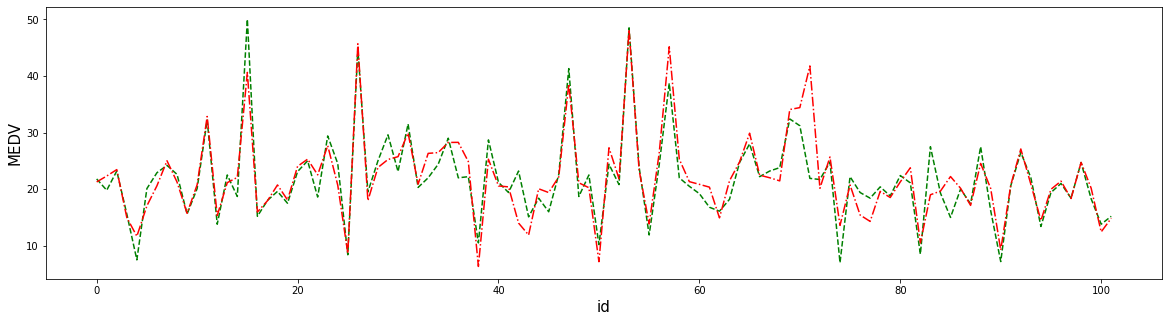

In [304]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

### 有数据增强 低

In [305]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train_scaled, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# rf_score = r2_score(y_test, rf_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_features': 0.7, 'n_estimators': 100} for the optimal model.
Optimal model has best score 0.7963404670.
{'max_features': 0.6, 'n_estimators': 5} Test score: 0.7344669933
{'max_features': 0.6, 'n_estimators': 10} Test score: 0.7705111265
{'max_features': 0.6, 'n_estimators': 20} Test score: 0.7687497134
{'max_features': 0.6, 'n_estimators': 50} Test score: 0.7936617625
{'max_features': 0.6, 'n_estimators': 100} Test score: 0.7819656866
{'max_features': 0.6, 'n_estimators': 200} Test score: 0.7888752241
{'max_features': 0.7, 'n_estimators': 5} Test score: 0.7502396782
{'max_features': 0.7, 'n_estimators': 10} Test score: 0.7661874366
{'max_features': 0.7, 'n_estimators': 20} Test score: 0.7760822356
{'max_features': 0.7, 'n_estimators': 50} Test score: 0.7823667122
{'max_features': 0.7, 'n_estimators': 100} Test score: 0.7963404670
{'max_features': 0.7, 'n_estimators': 200} Test score: 0.7915252587
{'max_features': 0.8, 'n_estimators': 5} Test score: 0.7356628386
{'ma

array([20.523, 21.828, 23.42 , 24.205,  9.958, 20.321, 22.434, 23.491,
       24.552, 18.449, 21.445, 32.904, 22.177, 22.01 , 20.136, 40.457,
       15.744, 17.478, 21.36 , 18.877, 22.753, 23.62 , 22.982, 26.17 ,
       20.877, 13.18 , 43.353, 24.229, 21.172, 27.459, 26.791, 26.727,
       20.789, 26.26 , 24.044, 28.776, 22.605, 23.774, 10.535, 23.04 ,
       20.569, 23.353, 18.887, 13.223, 19.226, 21.067, 22.6  , 26.154,
       25.36 , 19.622, 11.185, 26.07 , 22.107, 47.455, 22.599, 14.454,
       24.387, 40.075, 28.481, 21.088, 21.543, 19.303, 14.674, 22.217,
       23.415, 26.668, 23.741, 22.809, 21.692, 30.031, 26.92 , 30.283,
       21.654, 24.467, 15.982, 23.055, 18.336, 14.267, 19.883, 18.611,
       21.575, 21.128, 12.494, 15.031, 19.789, 25.735, 20.488, 16.919,
       20.579, 19.996, 12.187, 20.164, 24.109, 19.605, 17.357, 19.473,
       22.771, 17.911, 23.976, 20.487, 13.34 , 14.616])

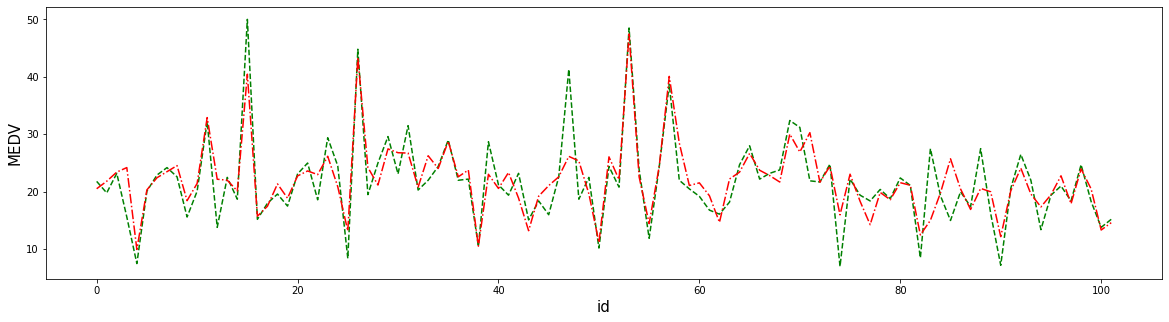

In [306]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

In [307]:
# testing set
rf_n_estimators = [5, 10, 20, 50, 100, 200]
# rf_max_depth = [3, 5, 7]
rf_max_features = [0.6, 0.7, 0.8, 1]
for i in rf_n_estimators:
    for k in rf_max_features:
        # The random forest regression module instantiates an object
        rf_reg = RandomForestRegressor(n_estimators=i, max_features=k)
        # Fit the training set with the random forest regression module
        rf_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        rf_reg_y_predict = rf_reg.predict(test_X_scaled)
        rf_reg_score = r2_score(y_test, rf_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(k), "R^2 score:{:,.10f}".format(rf_reg_score))

n_estimators:5    max_features:0.6    R^2 score:0.6125012168
n_estimators:5    max_features:0.7    R^2 score:0.4093994123
n_estimators:5    max_features:0.8    R^2 score:0.5775851765
n_estimators:5    max_features:1    R^2 score:0.3670372473
n_estimators:10    max_features:0.6    R^2 score:0.6692655862
n_estimators:10    max_features:0.7    R^2 score:0.6963541529
n_estimators:10    max_features:0.8    R^2 score:0.6407661512
n_estimators:10    max_features:1    R^2 score:0.5825484398
n_estimators:20    max_features:0.6    R^2 score:0.6876317694
n_estimators:20    max_features:0.7    R^2 score:0.7135810714
n_estimators:20    max_features:0.8    R^2 score:0.6561638284
n_estimators:20    max_features:1    R^2 score:0.5774861021
n_estimators:50    max_features:0.6    R^2 score:0.7116964179
n_estimators:50    max_features:0.7    R^2 score:0.7185811723
n_estimators:50    max_features:0.8    R^2 score:0.6853722840
n_estimators:50    max_features:1    R^2 score:0.6485209497
n_estimators:100    

### 方法八： 极端随机森林回归

### 无数据增强 高

In [308]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(X_test)
# Get the R^2 score of the trained model
# et_score = r2_score(y_test, et_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 300} for the optimal model.
Optimal model has best score 0.8968623301.
{'max_features': 1, 'n_estimators': 50} Test score: 0.8271613850
{'max_features': 1, 'n_estimators': 100} Test score: 0.8397130228
{'max_features': 1, 'n_estimators': 200} Test score: 0.8323864174
{'max_features': 1, 'n_estimators': 300} Test score: 0.8351854893
{'max_features': 1, 'n_estimators': 400} Test score: 0.8368837576
{'max_features': 2, 'n_estimators': 50} Test score: 0.8655414283
{'max_features': 2, 'n_estimators': 100} Test score: 0.8666130547
{'max_features': 2, 'n_estimators': 200} Test score: 0.8683678893
{'max_features': 2, 'n_estimators': 300} Test score: 0.8703714962
{'max_features': 2, 'n_estimators': 400} Test score: 0.8702482750
{'max_features': 3, 'n_estimators': 50} Test score: 0.8779193498
{'max_features': 3, 'n_estimators': 100} Test score: 0.8851938515
{'max_features': 3, 'n_estimators': 200} Test score: 0.8874312160
{'max_features': 3, 'n_

array([21.59      , 21.69033333, 24.264     , 15.29033333,  9.22      ,
       18.112     , 21.482     , 24.51966667, 23.051     , 16.91266667,
       22.15933333, 33.96266667, 15.84366667, 21.906     , 20.76866667,
       44.727     , 16.50333333, 18.315     , 20.93233333, 17.83966667,
       24.454     , 25.14966667, 22.76      , 29.11633333, 21.29866667,
        9.29433333, 44.37866667, 18.53333333, 21.538     , 26.947     ,
       26.90066667, 31.97333333, 21.202     , 26.226     , 26.374     ,
       28.64066667, 24.13733333, 24.38333333,  7.12333333, 25.114     ,
       20.978     , 21.884     , 15.07533333, 13.29466667, 19.50166667,
       20.02633333, 23.22366667, 38.39266667, 20.253     , 20.45833333,
        8.82666667, 27.13666667, 21.29133333, 48.22066667, 24.19      ,
       13.23033333, 26.58533333, 43.052     , 26.11666667, 22.45766667,
       20.687     , 20.125     , 15.29366667, 21.15266667, 27.59366667,
       29.46566667, 24.18466667, 23.28366667, 22.23066667, 33.92

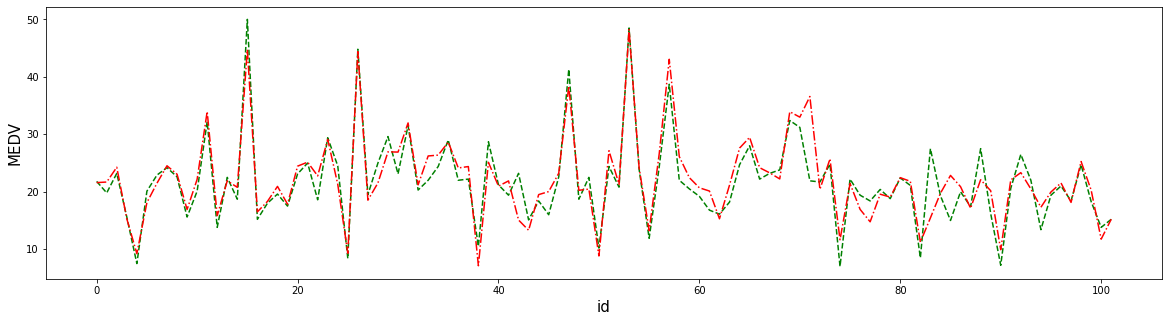

In [309]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

### 有数据增强 低

In [310]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train_scaled, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# et_score = r2_score(y_test, et_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 400} for the optimal model.
Optimal model has best score 0.7425127515.
{'max_features': 1, 'n_estimators': 50} Test score: 0.6089794433
{'max_features': 1, 'n_estimators': 100} Test score: 0.6057702596
{'max_features': 1, 'n_estimators': 200} Test score: 0.6070390370
{'max_features': 1, 'n_estimators': 300} Test score: 0.6015286961
{'max_features': 1, 'n_estimators': 400} Test score: 0.6038204396
{'max_features': 2, 'n_estimators': 50} Test score: 0.6735992410
{'max_features': 2, 'n_estimators': 100} Test score: 0.6610922618
{'max_features': 2, 'n_estimators': 200} Test score: 0.6703882405
{'max_features': 2, 'n_estimators': 300} Test score: 0.6764880628
{'max_features': 2, 'n_estimators': 400} Test score: 0.6759723910
{'max_features': 3, 'n_estimators': 50} Test score: 0.7034528289
{'max_features': 3, 'n_estimators': 100} Test score: 0.7112412250
{'max_features': 3, 'n_estimators': 200} Test score: 0.7154012672
{'max_features': 3, 'n_

array([23.08525, 22.39575, 25.51475, 19.23125, 10.663  , 19.816  ,
       22.4955 , 23.4465 , 25.269  , 20.3425 , 21.41475, 29.63275,
       17.979  , 23.26275, 20.26925, 45.7725 , 15.7205 , 17.28475,
       23.137  , 18.924  , 23.226  , 23.781  , 24.87775, 25.5745 ,
       22.05125, 16.744  , 41.86375, 20.172  , 21.362  , 30.296  ,
       26.136  , 28.0155 , 21.1045 , 26.8855 , 24.81425, 26.0345 ,
       23.057  , 23.81125, 11.88025, 22.863  , 20.2475 , 24.5095 ,
       18.09925, 13.23325, 19.1975 , 22.49825, 24.171  , 29.05625,
       20.968  , 20.54325, 12.79925, 25.957  , 22.29575, 47.22875,
       24.294  , 18.57625, 26.8355 , 34.09825, 26.18   , 20.62475,
       20.07225, 19.57325, 14.31375, 21.92575, 24.41075, 25.24325,
       25.9235 , 24.55225, 19.68975, 28.965  , 26.54225, 28.27075,
       22.1655 , 23.21625, 16.4155 , 23.97225, 20.04875, 14.102  ,
       20.456  , 20.32475, 22.95825, 21.00375, 12.434  , 17.9095 ,
       20.013  , 25.825  , 20.26425, 17.2285 , 21.52825, 20.78

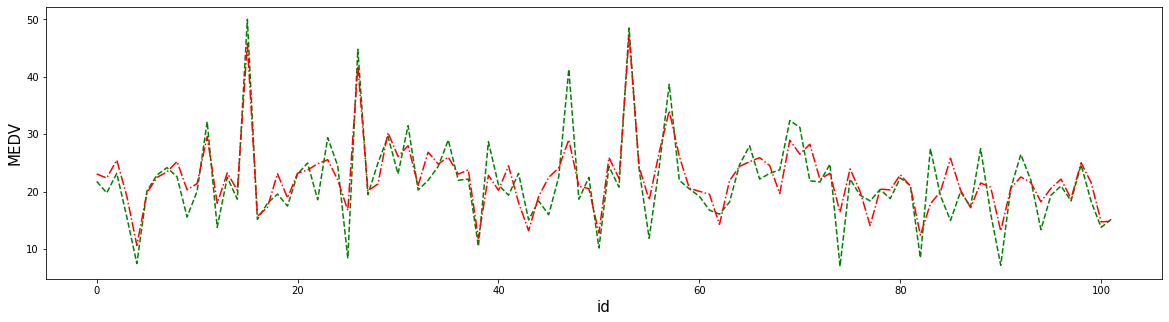

In [311]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

In [312]:
# testing set
et_n_estimators = [50, 100, 200, 300, 400]
et_max_features = [1,2,3,4]
for i in et_n_estimators:
    for j in et_max_features:
        # The extra trees regression module instantiates an object
        et_reg = ExtraTreesRegressor(n_estimators=i, max_features=j)#(alpha表示正则的程度）
        # Fit the training set with the extra trees regression module
        et_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        et_reg_y_predict = et_reg.predict(test_X_scaled)
        et_reg_score = r2_score(y_test, et_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(j), "R^2 score:{:,.10f}".format(et_reg_score))

n_estimators:50    max_features:1    R^2 score:0.6879375298
n_estimators:50    max_features:2    R^2 score:0.7165458963
n_estimators:50    max_features:3    R^2 score:0.7527087072
n_estimators:50    max_features:4    R^2 score:0.7730814957
n_estimators:100    max_features:1    R^2 score:0.7093517945
n_estimators:100    max_features:2    R^2 score:0.7092567058
n_estimators:100    max_features:3    R^2 score:0.7618580878
n_estimators:100    max_features:4    R^2 score:0.7604632055
n_estimators:200    max_features:1    R^2 score:0.7111350503
n_estimators:200    max_features:2    R^2 score:0.7454445728
n_estimators:200    max_features:3    R^2 score:0.7487476608
n_estimators:200    max_features:4    R^2 score:0.7588501484
n_estimators:300    max_features:1    R^2 score:0.7002321181
n_estimators:300    max_features:2    R^2 score:0.7395087254
n_estimators:300    max_features:3    R^2 score:0.7620022952
n_estimators:300    max_features:4    R^2 score:0.7713072673
n_estimators:400    max_feat

### 方法九：梯度提升回归

### 无数据增强 高

In [313]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(X_test)
# Get the R^2 score of the trained model
gb_score = r2_score(y_test, gb_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 200, 'subsample': 1} for the optimal model.
Optimal model has best score 0.9018163482.
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.8045965230
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.8657424028
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.8765121440
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.8766604291
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0.8745439515
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 100, 'subsample': 1} Test score: 0.8797128566
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 200, 'subsample': 1} Test score: 0.8802963002
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 300, 'subsample': 1} Test score: 0.8917812680
{'learning

array([19.86808584, 21.80275778, 24.17866199, 14.56767562,  9.34788012,
       18.28544316, 20.31508753, 25.35819762, 22.70145949, 14.16701445,
       21.36379591, 31.35200153, 13.90659252, 20.15229497, 21.57580439,
       32.47314656, 17.48994814, 18.49673729, 20.25593313, 17.42558656,
       22.46278652, 25.53092868, 22.52625763, 28.77439678, 20.38526812,
        7.31680854, 44.93736977, 15.64691167, 22.91829687, 26.79358458,
       25.69117386, 30.53384844, 20.80180894, 26.42105733, 24.76608731,
       28.16010959, 27.45423728, 22.80837526,  5.17185801, 25.90321931,
       21.33656242, 22.92428128, 13.42869237, 10.53215459, 20.86120607,
       17.78540731, 23.27656102, 38.01686605, 18.86384519, 19.33487992,
        7.21736076, 27.53851055, 21.71016883, 51.43198725, 24.38105388,
       21.10490135, 23.87176081, 42.11193691, 24.27527346, 19.14549931,
       19.45989902, 19.77358368, 14.93330311, 20.76487762, 25.97855112,
       27.81417116, 23.29791936, 22.59477269, 21.08784348, 32.88

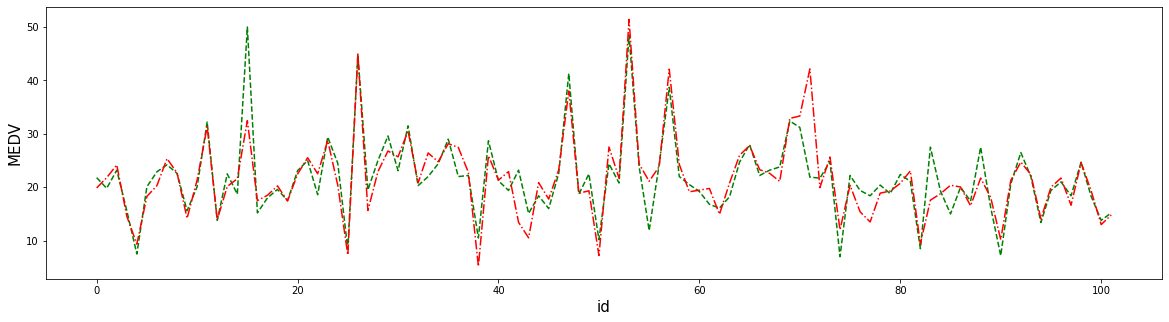

In [314]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

### 有数据增强 低

In [315]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train_scaled, y_train, {'n_estimators':[50,100,200,300], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# gb_score = r2_score(y_test, gb_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 300, 'subsample': 1} for the optimal model.
Optimal model has best score 0.7808263500.
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.4977880213
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.6508241471
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.7059758134
{'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.7023564988
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0.6137365130
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 100, 'subsample': 1} Test score: 0.7163881112
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 200, 'subsample': 1} Test score: 0.7444253479
{'learning_rate': 0.1, 'max_features': 2, 'n_estimators': 300, 'subsample': 1} Test score: 0.7586035318
{'learning

array([23.43030103, 19.35467895, 26.4731463 , 20.14618045, 11.08367359,
       18.76379102, 21.42718124, 24.06827138, 21.95992137, 19.52591694,
       19.40579138, 28.58219098, 16.08831546, 22.59498301, 21.0264103 ,
       40.33362079, 16.55418621, 16.91130547, 19.92920818, 18.93203343,
       22.35784952, 21.09217808, 25.98752596, 26.12828826, 24.33294175,
       15.09561668, 41.30706087, 19.92436177, 22.41587615, 26.25606214,
       22.71811991, 31.65794764, 20.98123192, 24.24788345, 23.69938548,
       27.23814321, 22.33663536, 23.23713303,  7.00637951, 23.84122382,
       20.76177893, 22.2079575 , 18.3278931 , 12.58253371, 17.96921003,
       20.17099777, 24.28067169, 32.13170393, 18.84099823, 18.24105821,
        8.96562156, 25.30418168, 21.6831361 , 47.21601825, 24.37886443,
       11.44475399, 28.94302621, 35.67562503, 25.05688464, 19.39758529,
       18.52521251, 21.61954642, 13.26664185, 21.19443116, 23.05063647,
       25.17435404, 25.13084999, 22.82204463, 20.06239489, 30.99

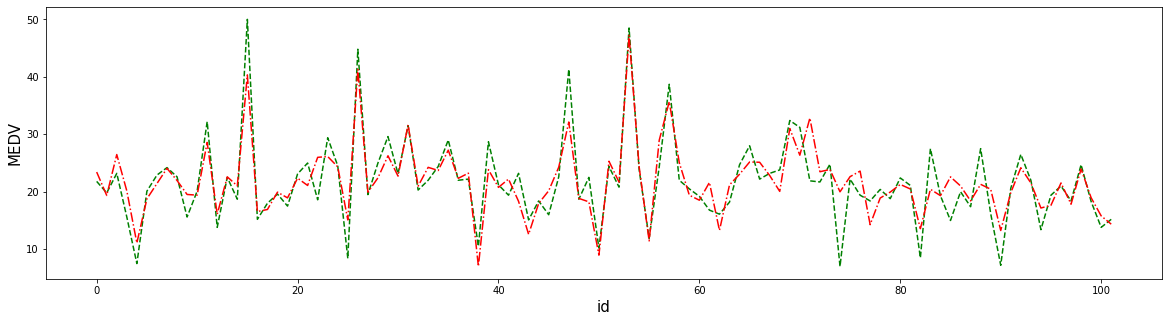

In [316]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

In [317]:
# testing set
gb_n_estimators = [50, 100, 200, 300]
# gb_max_depth = [3, 4, 5, 6]
gb_max_features = [1, 2, 3]
for i in gb_n_estimators:
    for k in gb_max_features:
        # The gradient boosting regression module instantiates an object
        gb_reg = GradientBoostingRegressor(n_estimators=i, max_features=k, subsample=1)
        # Fit the training set with the gradient boosting regression module
        gb_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        gb_reg_y_predict = gb_reg.predict(test_X_scaled)
        gb_reg_score = r2_score(y_test, gb_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(k), "subsample:1   learning_rate:0.1   ", "R^2 score:{:,.10f}".format(gb_reg_score))

n_estimators:50    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.5077695996
n_estimators:50    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6083318307
n_estimators:50    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6509799358
n_estimators:100    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.6843747015
n_estimators:100    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.7627372923
n_estimators:100    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.7277009599
n_estimators:200    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.6815661384
n_estimators:200    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.7222377108
n_estimators:200    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.7609003476
n_estimators:300    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.7958881136
n_estimators:300    max_features:2    subsa

### 方法十：AdaBoost log

### 无数据增强 高

In [318]:
# training set
# Get the best parameters for the model
ab_reg = grid_search(AdaBoostRegressor(), X_train, y_train_log, {'n_estimators': [50,100,200], 'learning_rate': [0.05,0.1,0.3,1],'loss':['linear','square','exponential']})
# Use the best model to make predictions
ab_reg_y_predict = ab_reg.predict(X_test)
# Get the R^2 score of the trained model
ab_score = r2_score(y_test_log, ab_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ab_score))
ab_reg_y_predict

Parameters are {'learning_rate': 1, 'loss': 'square', 'n_estimators': 50} for the optimal model.
Optimal model has best score 0.8396407246.
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50} Test score: 0.8104096189
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100} Test score: 0.8200538403
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 200} Test score: 0.8341358350
{'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 50} Test score: 0.8218495438
{'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 100} Test score: 0.8257849060
{'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 200} Test score: 0.8330824529
{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 50} Test score: 0.8099130497
{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 100} Test score: 0.8159398988
{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 200} Test score: 0.8300101911
{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators':

array([3.07819792, 3.235876  , 3.29496876, 2.83445457, 2.36656982,
       2.87598153, 3.07794201, 3.29496876, 3.235876  , 2.89709015,
       3.07480958, 3.40526851, 2.64097538, 3.07794201, 3.26091108,
       3.62608894, 2.90519628, 2.80502861, 3.05659483, 2.96553227,
       3.29170319, 3.40526851, 3.28174848, 3.45137796, 3.03024055,
       2.18335913, 3.7348173 , 2.89709015, 3.29170319, 3.07819792,
       3.29496876, 3.51570223, 3.28174848, 3.29496876, 3.29496876,
       3.28174848, 3.03211309, 3.25219027, 2.0033717 , 3.26091108,
       3.07590465, 3.10488572, 2.77442468, 2.52153253, 3.03024055,
       2.96782636, 3.07590465, 3.59889963, 2.96782636, 2.94203922,
       2.15472797, 3.39263407, 3.07995853, 3.7348173 , 3.235876  ,
       2.43547419, 3.31959984, 3.71107754, 3.11516867, 3.1079404 ,
       3.07819792, 3.02653527, 2.81753756, 3.07590465, 3.34234069,
       3.50946098, 3.29496876, 3.1079404 , 3.07590465, 3.58407632,
       3.53020841, 3.81278195, 2.98318824, 3.235876  , 2.48392

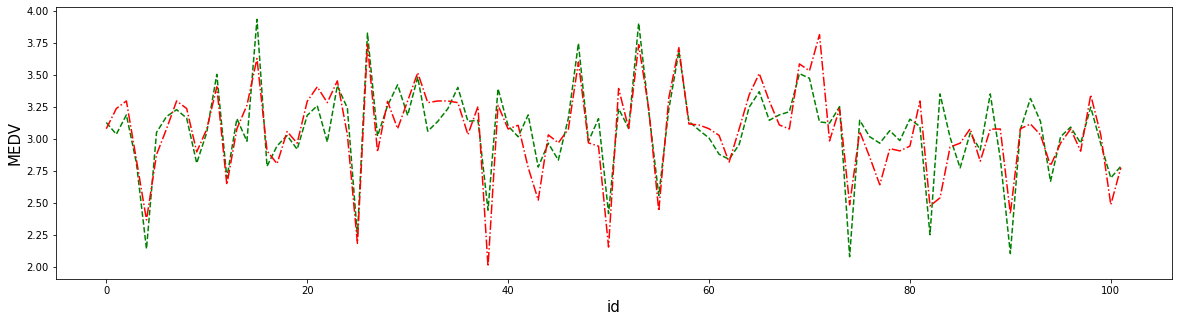

In [319]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ab_reg_y_predict)

### 有数据增强 低

In [320]:
# training set
# Get the best parameters for the model
ab_reg = grid_search(AdaBoostRegressor(), X_train_scaled, y_train_log, {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.05,0.1,0.3,1],'loss':['linear','square','exponential']})
# Use the best model to make predictions
ab_reg_y_predict = ab_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
ab_score = r2_score(y_test_log, ab_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ab_score))
ab_reg_y_predict

Parameters are {'learning_rate': 1, 'loss': 'square', 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.7827835621.
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50} Test score: 0.6758848206
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100} Test score: 0.6788521813
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200} Test score: 0.6948855477
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50} Test score: 0.6773510938
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100} Test score: 0.6852524904
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 200} Test score: 0.7101818564
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50} Test score: 0.6736484857
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100} Test score: 0.6766357163
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200} Test score: 0.6869993799
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators

array([3.07215507, 3.09048129, 3.17222896, 2.96578285, 2.39034598,
       2.92466652, 3.17222896, 3.14647953, 3.19816795, 2.88914104,
       3.11373168, 3.41299874, 2.9443263 , 3.09666472, 3.15539662,
       3.68860334, 2.88914104, 2.88884141, 3.14133042, 2.857833  ,
       3.15539662, 3.09666472, 3.11857519, 3.28245792, 2.98870337,
       2.67319553, 3.67544952, 2.90982138, 3.08303542, 3.20267947,
       3.15426224, 3.343831  , 3.00441748, 3.14647953, 3.1923008 ,
       3.28198894, 3.05284339, 3.36090076, 2.26025165, 3.11373168,
       2.96811893, 3.1526337 , 2.88871915, 2.75253627, 2.92115305,
       3.02358374, 3.09048129, 3.28245792, 2.8993328 , 2.89775571,
       2.30491914, 3.32372567, 3.0396808 , 3.65591199, 3.03758123,
       2.62603947, 3.15539662, 3.62843847, 3.16161559, 3.10221343,
       2.95295034, 2.92144951, 2.78258132, 3.08843561, 3.13645781,
       3.32243155, 3.17715092, 3.21109686, 3.08303542, 3.52385201,
       3.1421776 , 3.55328338, 2.9978583 , 3.15426224, 2.84635

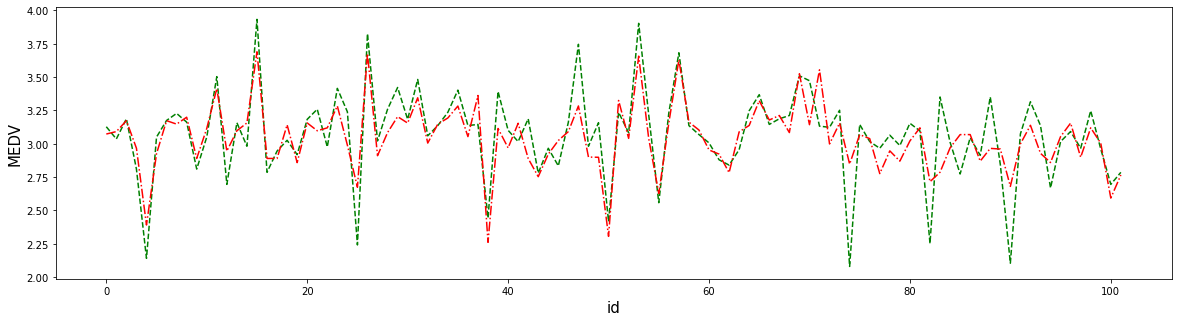

In [321]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ab_reg_y_predict)

In [322]:
# testing set
ab_n_estimators = [50, 100, 200]
ab_learning_rate = [0.01, 0.05, 0.1, 0.3, 1]
ab_loss = ['linear', 'square', 'exponential']
for i in ab_n_estimators:
    for j in ab_learning_rate:
        for k in ab_loss:
            # AdaBoost regression module instantiates an object
            ab_reg = AdaBoostRegressor(n_estimators=i, learning_rate=j, loss=k)
            # Fit the training set with the AdaBoost regression module
            ab_reg.fit(X_train_scaled, y_train_log)
            # Model evaluation
            ab_reg_y_predict = ab_reg.predict(test_X_scaled)
            ab_reg_score = r2_score(y_test_log, ab_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "learning_rate:{:,}   ".format(j),  "loss:{}   ".format(k),"R^2 score:{:,.10f}".format(ab_reg_score))

n_estimators:50    learning_rate:0.01    loss:linear    R^2 score:0.5210232195
n_estimators:50    learning_rate:0.01    loss:square    R^2 score:0.5015527479
n_estimators:50    learning_rate:0.01    loss:exponential    R^2 score:0.4936031802
n_estimators:50    learning_rate:0.05    loss:linear    R^2 score:0.5547792445
n_estimators:50    learning_rate:0.05    loss:square    R^2 score:0.5698384805
n_estimators:50    learning_rate:0.05    loss:exponential    R^2 score:0.5431035579
n_estimators:50    learning_rate:0.1    loss:linear    R^2 score:0.5767475265
n_estimators:50    learning_rate:0.1    loss:square    R^2 score:0.5944725355
n_estimators:50    learning_rate:0.1    loss:exponential    R^2 score:0.5659002731
n_estimators:50    learning_rate:0.3    loss:linear    R^2 score:0.6298305456
n_estimators:50    learning_rate:0.3    loss:square    R^2 score:0.6150915864
n_estimators:50    learning_rate:0.3    loss:exponential    R^2 score:0.6151058594
n_estimators:50    learning_rate:1    

## 6.3SVM

### 方法十一：SVR

### 无数据增强 高

In [323]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(X_test)
# Get the R^2 score of the trained model
# svr_score = r2_score(y_test, svr_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 50, 'gamma': 0.1} for the optimal model.
Optimal model has best score 0.8662486054.
{'C': 10, 'gamma': 0.01} Test score: 0.7811292139
{'C': 10, 'gamma': 0.1} Test score: 0.8181581087
{'C': 10, 'gamma': 0.125} Test score: 0.8087491585
{'C': 10, 'gamma': 0.25} Test score: 0.7629039553
{'C': 10, 'gamma': 0.5} Test score: 0.6834551518
{'C': 10, 'gamma': 1} Test score: 0.5509683296
{'C': 20, 'gamma': 0.01} Test score: 0.8107601630
{'C': 20, 'gamma': 0.1} Test score: 0.8494442077
{'C': 20, 'gamma': 0.125} Test score: 0.8443662561
{'C': 20, 'gamma': 0.25} Test score: 0.8026154560
{'C': 20, 'gamma': 0.5} Test score: 0.7345633840
{'C': 20, 'gamma': 1} Test score: 0.6197812614
{'C': 50, 'gamma': 0.01} Test score: 0.8374376343
{'C': 50, 'gamma': 0.1} Test score: 0.8662486054
{'C': 50, 'gamma': 0.125} Test score: 0.8579461468
{'C': 50, 'gamma': 0.25} Test score: 0.8192099532
{'C': 50, 'gamma': 0.5} Test score: 0.7493905126
{'C': 50, 'gamma': 1} Test score: 0.6319852771
{'C': 1

array([19.87152924, 20.49538081, 22.76739038, 12.54787684,  9.82736901,
       21.98367367, 21.29309241, 26.07090932, 24.42224271, 21.79482628,
       20.56534147, 37.58625319, 14.96653895, 22.55501123, 21.25131727,
       49.60950627, 16.67223368, 18.22640626, 21.03621126, 17.55021438,
       24.52687778, 25.86172233, 21.74697088, 33.28946477, 24.0598071 ,
        7.85099503, 48.37653217, 19.79218709, 21.3043241 , 27.84433588,
       25.26307779, 33.76602033, 20.40853171, 28.21604537, 25.91008698,
       29.85578926, 23.89266659, 24.13590474,  6.44070549, 31.65943457,
       21.489549  , 20.43729266, 15.3600287 , 14.13928301, 19.46629955,
       18.04453344, 23.23857755, 39.73238623, 18.71074118, 18.93600589,
        6.13525701, 28.09144119, 22.59007192, 50.13806378, 24.176318  ,
        9.23253001, 25.27232473, 43.06364439, 25.4097323 , 21.04417501,
       19.57099518, 20.35341696, 15.07724554, 19.77554318, 25.07224111,
       30.85570909, 24.88681986, 24.92096374, 22.3170558 , 34.00

In [324]:
# submission = {"prediction":svr_reg_y_predict}
# submission = pd.DataFrame(submission)
# submission.to_csv('svr_regression.csv')

In [325]:
import joblib
joblib.dump(svr_reg, "./test.pkl")

['./test.pkl']

In [326]:
estimator = joblib.load("./test.pkl")
# estimator_y_predict = estimator.predict(X_test)
# estimator_score = r2_score(y_test, estimator_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(estimator_score))
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# print(X_test[0])
# X_test0 = [[]]
# X_test0[1][13]=X_test[0]
# X_test0[0] = X_test[0]
print(X_test0)
y_predict = estimator.predict(X_test0)
print(y_predict)
print(y_predict[0])
# estimator_y_predict

[[ 0.12722226 -0.44099479  1.02862428 ...  0.82571281  0.33986867
  -0.34642743]
 [ 0.12722226 -0.44099479  1.02862428 ...  0.82571281  0.33986867
  -0.34642743]
 [-0.48619175 -0.44099479 -1.21483405 ... -0.81557248 -0.0142874
  -0.54864787]
 ...
 [-0.43687423 -0.44099479 -0.24105839 ...  0.32835363  0.39775537
   0.21309981]
 [ 1.96102694 -0.44099479  1.02862428 ...  0.82571281  0.39775537
   3.35587915]
 [ 0.7074143  -0.44099479  1.02862428 ...  0.82571281 -0.20743699
   0.76502477]]
[19.9476608  19.9476608  20.49589828 22.81005876 12.56296665  9.82384935
 21.94105272 21.27253521 26.13701044 24.47133451 21.86669513 20.53895762
 37.72060675 15.06995368 22.57074851 21.25347465 49.72968853 16.60701972
 18.19337583 20.99748281 17.48073521 24.567994   25.91852189 21.74478961
 33.40027002 24.02547046  7.81072737 48.49173015 19.72289164 21.28154814
 27.87571849 25.40173388 33.90464184 20.41162943 28.26566702 25.97457425
 29.82642695 23.92682166 24.19648405  6.34714713 31.70841704 21.457332


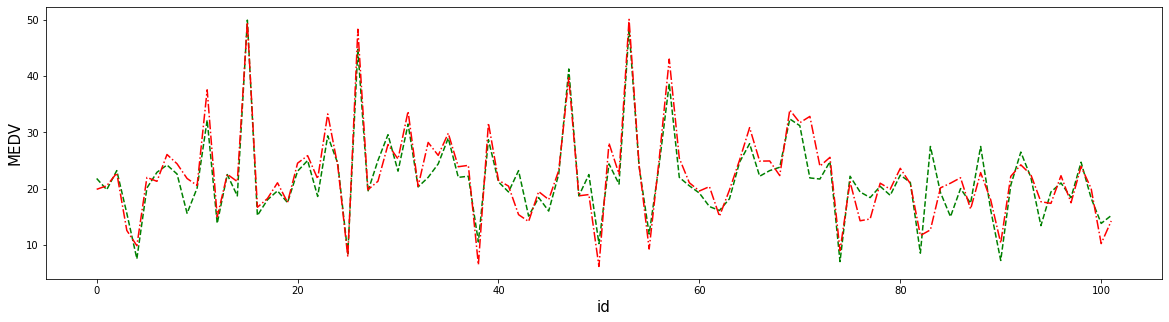

In [327]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, svr_reg_y_predict)

### 有数据增强 低

In [328]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train_scaled, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# svr_score = r2_score(y_test, svr_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 100, 'gamma': 0.01} for the optimal model.
Optimal model has best score 0.8645684855.
{'C': 10, 'gamma': 0.01} Test score: 0.8010347895
{'C': 10, 'gamma': 0.1} Test score: 0.5492510451
{'C': 10, 'gamma': 0.125} Test score: 0.5008860771
{'C': 10, 'gamma': 0.25} Test score: 0.3922005577
{'C': 10, 'gamma': 0.5} Test score: 0.3297913623
{'C': 10, 'gamma': 1} Test score: 0.2616565117
{'C': 20, 'gamma': 0.01} Test score: 0.8382139984
{'C': 20, 'gamma': 0.1} Test score: 0.6136445103
{'C': 20, 'gamma': 0.125} Test score: 0.5685536158
{'C': 20, 'gamma': 0.25} Test score: 0.4689384502
{'C': 20, 'gamma': 0.5} Test score: 0.4073685062
{'C': 20, 'gamma': 1} Test score: 0.3367003443
{'C': 50, 'gamma': 0.01} Test score: 0.8614814422
{'C': 50, 'gamma': 0.1} Test score: 0.6274674846
{'C': 50, 'gamma': 0.125} Test score: 0.5816690399
{'C': 50, 'gamma': 0.25} Test score: 0.4782924329
{'C': 50, 'gamma': 0.5} Test score: 0.4195948345
{'C': 50, 'gamma': 1} Test score: 0.3555154171
{'C':

array([18.33654988, 17.93832916, 23.04223578, 18.51899606,  9.7419551 ,
       15.98036643, 22.28875247, 24.18884814, 23.55341664, 16.03224263,
       18.87769034, 35.47417221, 19.35828364, 21.88033702, 19.51131713,
       49.0898491 , 16.08333096, 17.77426858, 18.98290123, 17.44103868,
       23.38088084, 25.73114854, 20.81960411, 30.31752379, 21.49852056,
        9.98690596, 41.79427984, 19.62123358, 19.50187411, 26.82386638,
       23.61746426, 32.41773247, 21.27121879, 25.64943612, 24.72237024,
       27.76518552, 22.85451152, 23.93502363,  6.26504591, 23.78526711,
       21.12220824, 21.81717101, 16.97107472, 13.90037731, 19.22904786,
       18.2024244 , 25.63762897, 32.84266216, 20.3906193 , 18.40056482,
        6.78213651, 24.90183894, 20.15437265, 48.38675758, 23.08712747,
       19.27749477, 26.73194208, 38.87465743, 26.57370558, 20.47313514,
       20.13613425, 20.05493399, 15.05883302, 19.08576782, 24.58572682,
       27.952842  , 25.09626458, 25.56185005, 19.9335175 , 33.93

In [329]:
#testing set
svr_C = [10, 20, 50, 100]
svr_gamma = [0.01, 0.1, 0.125, 0.25, 0.5 ,1]
for i in svr_C:
    for j in svr_gamma:
        # The SVR module instantiates an object
        svr_reg =SVR(C=i, gamma=j)
        # Fit on the training set with the SVR module
        svr_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        svr_reg_y_predict = svr_reg.predict(test_X_scaled)
        svr_reg_score = r2_score(y_test, svr_reg_y_predict)
        print ("C:{:,}   ".format(i), "gamma:{:,}   ".format(j), "R^2 score:{:,.10f}".format(svr_reg_score))

C:10    gamma:0.01    R^2 score:0.7604639948
C:10    gamma:0.1    R^2 score:0.6522582274
C:10    gamma:0.125    R^2 score:0.6161722263
C:10    gamma:0.25    R^2 score:0.5236546008
C:10    gamma:0.5    R^2 score:0.4732405483
C:10    gamma:1    R^2 score:0.4203631920
C:20    gamma:0.01    R^2 score:0.7876354594
C:20    gamma:0.1    R^2 score:0.6800391399
C:20    gamma:0.125    R^2 score:0.6480686899
C:20    gamma:0.25    R^2 score:0.5576993948
C:20    gamma:0.5    R^2 score:0.5221585693
C:20    gamma:1    R^2 score:0.4881395729
C:50    gamma:0.01    R^2 score:0.8074835848
C:50    gamma:0.1    R^2 score:0.6767554052
C:50    gamma:0.125    R^2 score:0.6438990362
C:50    gamma:0.25    R^2 score:0.5522193959
C:50    gamma:0.5    R^2 score:0.5170708666
C:50    gamma:1    R^2 score:0.4930331225
C:100    gamma:0.01    R^2 score:0.8030290424
C:100    gamma:0.1    R^2 score:0.6766133398
C:100    gamma:0.125    R^2 score:0.6437759491
C:100    gamma:0.25    R^2 score:0.5505117326
C:100    gamma:0.5

### 6.4方法十二：K近邻

### 无数据增强 高

In [330]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(X_test)
# Get the R^2 score of the trained model
# knn_score = r2_score(y_test, knn_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 2, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7992073573.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7773166813
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7992073573
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7528970176
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7828926306
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5980134330
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6504070754
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4927007021
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5584023006


array([20.87334007, 20.97900864, 24.83077808, 14.35673161,  7.91994102,
       20.08316087, 18.9       , 23.15397802, 24.12767545, 16.21036531,
       21.42933513, 43.14120429, 14.06232436, 22.25037019, 18.74598471,
       50.        , 15.05339763, 17.4938444 , 19.49920986, 18.34315548,
       22.91002214, 23.45351127, 22.78958991, 36.15561564, 21.54032728,
        7.9243468 , 47.54986182, 19.45980903, 21.19555254, 29.27153996,
       28.6328758 , 38.05656741, 20.61227775, 22.71896923, 25.53724315,
       26.35135165, 23.67968725, 24.19816285,  6.6957538 , 23.31997032,
       20.25980395, 23.83503983, 15.55907678, 13.24796983, 19.02398335,
       18.163155  , 26.470149  , 50.        , 18.602199  , 18.7828905 ,
        7.98408193, 27.53065698, 21.33239752, 50.        , 25.30633246,
        6.75084858, 20.78461397, 44.94160797, 27.10267562, 21.01200845,
       19.78826263, 19.58044055, 14.8509593 , 20.29241903, 23.41453741,
       28.0472898 , 24.59023769, 24.13485514, 20.14319096, 33.13

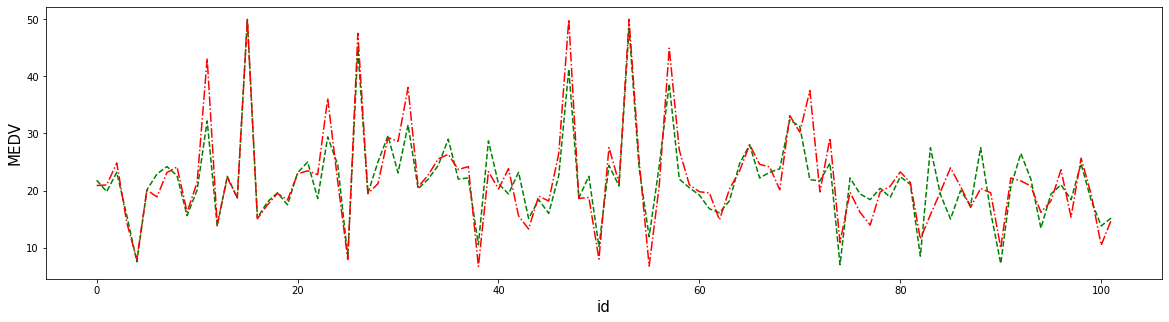

In [331]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

### 有数据增强 低

In [332]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train_scaled, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# knn_score = r2_score(y_test, knn_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 10, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7506083139.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7112834089
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7143073138
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7030020742
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7506083139
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5820490262
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6478412464
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4639334218
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5443023989


array([23.75782914, 20.48405715, 26.46875588, 16.22142917,  9.96793128,
       24.03330109, 21.21200894, 23.66775217, 26.19762794, 18.45372263,
       21.3861878 , 36.20251639, 16.21643976, 24.08428221, 20.29661291,
       40.78586224, 14.63466645, 18.261903  , 22.74087617, 17.90474004,
       22.73894731, 22.62660313, 25.83775191, 27.12992032, 21.17192357,
       11.45084879, 40.34496782, 17.77735763, 19.17830115, 27.55395931,
       24.79598485, 28.12380951, 20.6270398 , 27.31834587, 24.51683288,
       26.9094298 , 20.49745902, 23.08743397, 12.30417274, 21.24219491,
       20.06736029, 28.57906162, 15.92086499, 13.25330757, 18.73120361,
       20.99988938, 23.48096127, 34.06354368, 17.40800393, 17.73042845,
       12.02864963, 28.61320712, 20.90751792, 45.94890678, 24.28173389,
       20.07992169, 33.0320154 , 38.11655038, 29.92032442, 19.6696351 ,
       19.85608582, 19.15281034, 13.76345271, 22.61096143, 24.50980324,
       24.10513947, 26.29448128, 24.57063823, 19.05587807, 29.37

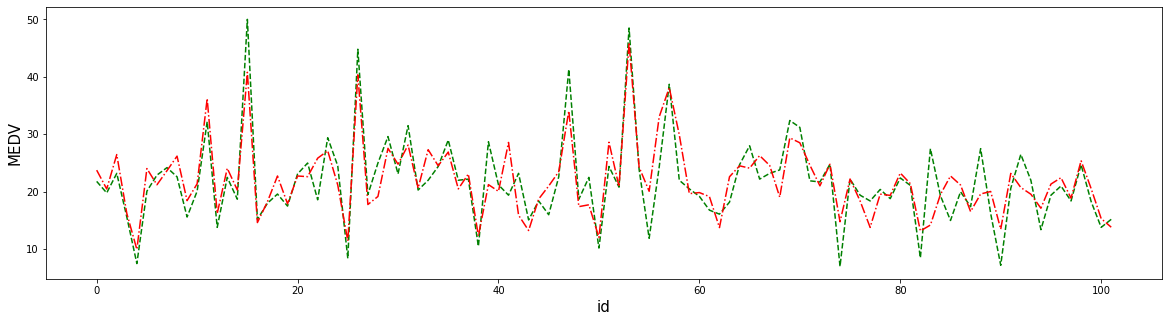

In [333]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

In [334]:
# testing set
knn_weights = ['uniform', 'distance']
knn_n_neighbors = [2, 10, 50 ,100]
for i in knn_weights:
    for j in knn_n_neighbors:
        # The KNeighbors regression module instantiates an object
        knn_reg =KNeighborsRegressor(weights=i, n_neighbors=j)
        # Fit on the training set with the KNeighbors regression module
        knn_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        knn_reg_y_predict = knn_reg.predict(test_X_scaled)
        knn_reg_score = r2_score(y_test, knn_reg_y_predict)
        print ("weights:{}   ".format(i), "n_neighbors:{:,}   ".format(j), "R^2 score:{:,.10f}".format(knn_reg_score))

weights:uniform    n_neighbors:2    R^2 score:0.5271325106
weights:uniform    n_neighbors:10    R^2 score:0.6269544493
weights:uniform    n_neighbors:50    R^2 score:0.4740070124
weights:uniform    n_neighbors:100    R^2 score:0.3996548030
weights:distance    n_neighbors:2    R^2 score:0.5155234722
weights:distance    n_neighbors:10    R^2 score:0.7248185037
weights:distance    n_neighbors:50    R^2 score:0.6020968782
weights:distance    n_neighbors:100    R^2 score:0.5228557837


### 6.5方法十三：内核岭回归

### 无数据增强

In [335]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train,y_train,{'alpha':[0.3,0.5,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(X_test)
# Get the R^2 score of the trained model
# kridge_score = r2_score(y_test, kridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8816650238.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8711053344
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8702103945
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8668731855
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8609338024
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8568511150
{'alpha': 0.5, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8787069944
{'alpha': 0.5, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8780593981
{'alpha': 0.5, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8750872794
{'alpha': 0.5, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8700704457
{'alpha': 0.5, 'coef0': 8, 'degree': 3, 'kernel'

array([24.44297955, 20.72907747, 24.28532545, 15.55751478,  7.027411  ,
       18.70658843, 20.9745426 , 26.69788697, 24.21075414, 14.62713738,
       21.28067667, 35.74156383, 18.34593805, 23.30766748, 21.64332136,
       56.9638935 , 15.30728125, 18.32742974, 23.62545916, 16.52478644,
       24.45060254, 25.57532217, 20.12469114, 32.61296685, 21.31713485,
        6.0289051 , 49.82106055, 18.10877812, 22.53019854, 25.96418869,
       26.40260839, 32.73642518, 20.9290007 , 27.41290184, 26.28183973,
       29.00872088, 24.71547373, 23.85789955,  3.38530598, 28.02370903,
       20.98244776, 20.59708919, 14.10983493, 16.32511834, 17.74564134,
       17.6696845 , 22.71549123, 39.95684277, 17.83909082, 17.91459286,
        4.97314672, 27.30007309, 21.71473905, 55.22590919, 24.85683138,
       11.77027576, 29.31831877, 48.99023881, 26.5480726 , 20.13260083,
       20.81331038, 18.75292452, 14.64929889, 19.87015127, 26.09550949,
       30.28913504, 25.27095534, 24.62279425, 25.19843193, 34.57

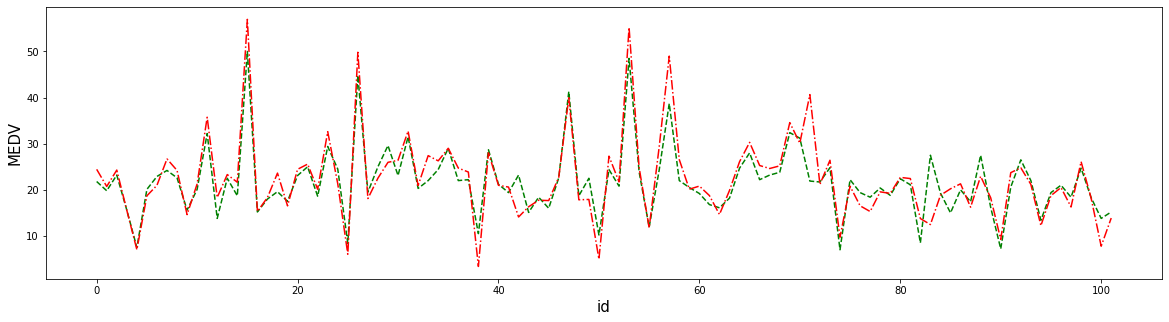

In [336]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

### 有数据增强

In [337]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train_scaled,y_train,{'alpha':[0.3,0.4,0.5,0.6,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
# kridge_score = r2_score(y_test, kridge_reg_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8716064707.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8637464675
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8613739066
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8477819235
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8114925914
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.7820395945
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8675497624
{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8660624015
{'alpha': 0.4, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8552146253
{'alpha': 0.4, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8243842011
{'alpha': 0.4, 'coef0': 8, 'degree': 3, 'kernel': 

array([18.91927413, 19.05565385, 24.10934089, 16.46254956,  9.61144081,
       17.99817257, 21.93212705, 24.47152724, 25.11944251, 13.54099184,
       20.04293333, 34.6519182 , 19.73320457, 21.95533275, 20.03631785,
       48.91373355, 15.72088599, 18.91201803, 21.42992524, 16.49005633,
       22.74999964, 24.13638193, 21.19182675, 30.03156488, 21.62659188,
        5.39031182, 42.62474057, 17.87742759, 20.68807592, 26.93919889,
       23.41992907, 31.41983748, 20.99004424, 24.88368272, 24.87620816,
       28.50301407, 21.99039746, 23.27318422,  6.22266174, 23.6684088 ,
       20.36853416, 19.96544448, 15.50448855, 14.3081282 , 18.90231679,
       17.41750212, 25.82180763, 32.32806249, 18.98786745, 18.20126088,
        7.06993534, 25.58146494, 20.36085483, 48.6357014 , 23.83440613,
       17.83560103, 27.80413719, 39.53513065, 27.70120641, 20.00106073,
       20.03005154, 20.68726352, 14.74298805, 18.54687197, 25.03074832,
       27.31752527, 24.72577836, 25.48612038, 21.02606579, 33.54

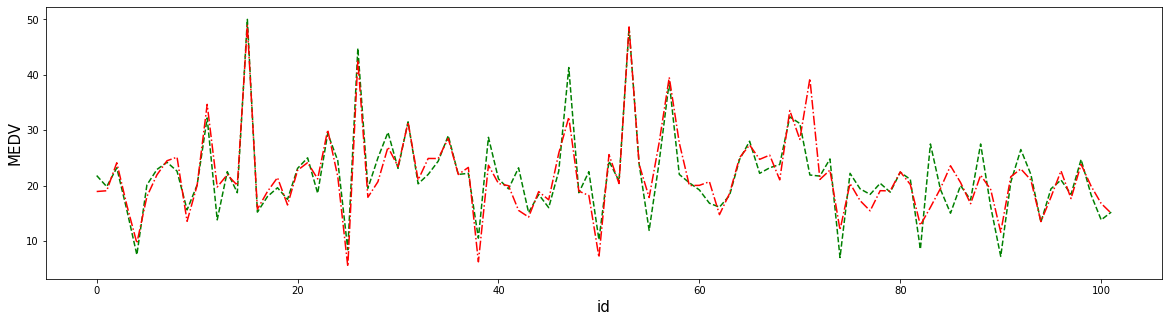

In [338]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

In [339]:
# testing set
kridge_alpha = [0.3, 0.5,  0.7]
kridge_coef0 = [0.8, 1, 2, 5, 8]
for i in kridge_alpha:
    for j in kridge_coef0:
        # The kernel ridge regression module instantiates an object
        kridge_reg = KernelRidge(alpha=i, coef0=j, kernel = 'polynomial', degree=3)#(alpha表示正则的程度）
        # Fit on the training set with the kernel ridge regression module
        kridge_reg.fit(X_train_scaled, y_train)
        # Model evaluation
        kridge_reg_y_predict = kridge_reg.predict(test_X_scaled)
        kridge_reg_score = r2_score(y_test, kridge_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "coef0:{:,}   ".format(j), "kernel:polynomial   degree:3   ""R^2 score:{:,.10f}".format(kridge_reg_score))

alpha:0.3    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7908831733
alpha:0.3    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7866481926
alpha:0.3    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7609347766
alpha:0.3    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7090379451
alpha:0.3    coef0:8    kernel:polynomial   degree:3   R^2 score:0.6782887490
alpha:0.5    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7938383007
alpha:0.5    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7914791405
alpha:0.5    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7710343265
alpha:0.5    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7254588124
alpha:0.5    coef0:8    kernel:polynomial   degree:3   R^2 score:0.6982021771
alpha:0.7    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7948569519
alpha:0.7    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7939256015
alpha:0.7    coef0:2    kernel:polynomial   degree:3   R^2

### 有数据增强R^2高：
线性回归                                  
岭回归                                                  
随机参数回归          
贝叶斯岭回归          
Lasso回归              
ElasticNet回归         
内核岭回归 

### 无数据增强R^2高：
随机森林  
极端随机森林  
梯度提升回归  
AdaBoost  
SVR 
K近邻




## Ensemble models

### Weights Averaging/Blending

In [340]:
# class Blending(BaseEstimator, RegressorMixin):
#     def __init__(self,mods,weight):
#         self.mods = mods
#         self.weight = weight
#         self.models_ = []
        
#     def fit(self,X,y):
#         self.models_ = [copy.deepcopy(x) for x in self.mods]
#         for model in self.models_:
#             model.fit(X,y)
#         return self
    
#     def predict(self,X):
#         w = []
#         #pred is the matrix that each row is the prediction of one model on the whole testing set
#         pred = np.array([model.predict(X) for model in self.models_])
#         weights_col = np.array(self.weight).reshape(-1,1)
#         #Broadcast weights_col
#         pred = pred * weights_col
#         w = np.sum(pred,axis=0)
#         return w

In [341]:
# lasso = Lasso(alpha=0.001,max_iter=10000) #0.7908607225 2
# ridge = Ridge(alpha=1) #0.7923795937 2
# en = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=100000) #0.7935282305 2
# svr = SVR(kernel='rbf',C=50,gamma=0.01) #0.8074835848 1
# kridge = KernelRidge(alpha=0.7 ,kernel='polynomial',degree=3 , coef0=0.8) #0.7948569519 2
# bridge = BayesianRidge() #0.7883048032 3
# et = ExtraTreesRegressor(n_estimators=200, max_features=4) #0.7673186457 4
# gb = GradientBoostingRegressor(n_estimators=100, max_depth=4, max_features=3, subsample=1) #0.8018346980 1

In [342]:
# def evaluation_criteria_r2(model,X,y):
#     r2 = cross_val_score(model,X,y,scoring = "r2",cv=5)
#     return r2

In [343]:
# weights1 = [[0.1,0.1,0.1,0.25,0.1,0.05,0.05,0.25],[0.1,0.1,0.15,0.2,0.1,0.1,0.05,0.2],[0.1,0.1,0.05,0.25,0.1,0.15,0.05,0.2]]
# for i in weights1:
#     blending = Blending(mods = [lasso,ridge,en,svr,kridge,bridge,et,gb], weight=i)
#     print ("Evaluation criteria r2 on training set is:",evaluation_criteria_r2(blending,X_train_scaled,y_train).mean())
#     # Fit on the training set with the kernel ridge regression module
#     blending.fit(X_train_scaled, y_train)
#     # Model evaluation
#     blending_y_predict = blending.predict(test_X_scaled)
#     blending_score = r2_score(y_test, blending_y_predict)
#     print ("R^2 score:{:,.10f}".format(blending_score))
#     # Visualize a comparison of real and predicted house prices
#     figure_prediction(y_test, blending_y_predict)

#### Experiments on Elastic Net, SVR,KernelRidge, GradientBoosting as the base models
The four models are the best model. We experiment on whether only combining them can lead to better results.

In [344]:
# weights2 = [[0,0,0.25,0.25,0.25,0,0,0.25]]
# for i in weights2:
#     blending = Blending(mods = [lasso,ridge,en,svr,kridge,bridge,et,gb], weight=i)
#     print ("Evaluation criteria r2 on training set is:",evaluation_criteria_r2(blending,X_train_scaled,y_train).mean())
#     blending.fit(X_train_scaled, y_train)
#     # Model evaluation
#     blending_y_predict = blending.predict(test_X_scaled)
#     blending_score = r2_score(y_test, blending_y_predict)
#     print ("R^2 score:{:,.10f}".format(blending_score))

In [345]:
# # Visualize a comparison of real and predicted house prices
# figure_prediction(y_test, blending_y_predict)